# Retail Sales Prediction
## Introduction
- The interest in a product continues to change occasionally. No business can work on its monetary growth without precisely assessing client interest and future demand for items.
- Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period.
- For a good sales forecast, it is also extremely important to get a good dataset. Forecasts heavily depend on the records, trends, and patterns observed for sales of a particular store. The variations could be due to several reasons.
- Talking from a business’s point of view, these sales forecasts are done consistently to improve

## Problem Statement
- XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales up to six weeks in advance. 
- Store sales are influenced by many factors, including promotions, competition, school, and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
- You are provided with historical sales data for 1,115 XYZ stores.  
- Note that some stores in the dataset were temporarily closed for refurbishment.
## Objective
The task is to forecast the "Sales" column up to six weeks.
## Data Description:
- Salesdata.csv - Historical data about the Sales
- store.csv - Additional details about the stores

# Field descriptions:
## Sales dataset
- **Id** - an Id that represents a (Store, Date) tuple within the set
- **Store** - a unique Id for each store
- **DayOfWeek** - Indicates which day of the week sales occurred (1 = Monday)
- **Date** - Date of the sales
- **Sales** - the turnover for any given day (Dependent Variable)
- **Customers** - the number of customers on a given day
- **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
- **Promo** - indicates whether a store is running a promo on that day
- **State Holiday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- **School Holiday** - indicates if the (Store) was affected by the closure of public schools
## Store dataset
- **Store Type** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
- **Competition Distance** – the distance in meters to the nearest competitor store
- **Competition Open Since[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2  Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **Promo Interval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, and November of any given year for that store.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Loading the dataset

In [2]:
sales_data = pd.read_csv('Salesdata.csv', parse_dates=['Date']) 
#parsing the 'Date' column as a date type to avoid manual conversion later
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
store_data = pd.read_csv('store.csv')
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Understanding the dataset

## Sales Data

In [4]:
sales_data.shape

(1017209, 9)

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [6]:
sales_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
#Displaying unique values for categorical columns in sales_data
columns = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
for col in columns:
    print(f'{col}: {sales_data[col].unique()}')

DayOfWeek: [5 4 3 2 1 7 6]
Open: [1 0]
Promo: [1 0]
StateHoliday: ['0' 'a' 'b' 'c' 0]
SchoolHoliday: [1 0]


In [8]:
print(sales_data['Date'].min())
print(sales_data['Date'].max())

2013-01-01 00:00:00
2015-07-31 00:00:00


### **In the Sales data :**
- The sales dataset contains 1,017,209 rows and 9 columns.
- The datatypes present are integer and object
- There are no null entries
- The following columns are Categorical: 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday', 'DayOfWeek'
- There is a discrepancy in the entries of the 'StateHoliday' column, where there are entries 0 and '0' separately which hold the same meaning
- Sales data is from 1st Jan 2013 to 31st July 2015

## Store Data

In [9]:
store_data.shape

(1115, 10)

In [10]:
store_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [12]:
len(store_data['Store'].unique())

1115

In [13]:
store_data[store_data['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [14]:
#Displaying unique values for categorical columns in store_data
columns = ['StoreType','Assortment','Promo2','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
for col in columns:
    print(f'{col}: {store_data[col].unique()}')

StoreType: ['c' 'a' 'd' 'b']
Assortment: ['a' 'c' 'b']
Promo2: [0 1]
CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]


In [15]:
print("Stores with no competitor opening date information:", store_data[store_data['CompetitionOpenSinceMonth'].isnull() & store_data['CompetitionOpenSinceYear'].isnull()].shape[0])
print("Stores not participating in Promo2:", store_data[store_data['Promo2']==0].shape[0])

Stores with no competitor opening date information: 354
Stores not participating in Promo2: 544


In [16]:
store_data.describe(include=object)

,StoreType,Assortment,PromoInterval
count,1115,1115,571
unique,4,3,3
top,a,a,"Jan,Apr,Jul,Oct"
freq,602,593,335


## **In the Store data:**
- The store dataset contains 1,115 rows and 10 columns.
- The store data is of 1115 different stores
- The datatypes present are integer, float and object
- The following columns are Categorical type: Store Type, Assortment, Promo2, Promo2SinceWeek, Promo2SinceYear, CompetitionOpenSinceMonth,CompetitionOpenSinceYear
- There are null entries in 6 of the columns
- Data for stores 291, 622, and 879 indicates they likely have no nearby competitors, as indicated by the missing values in 'CompetitionDistance', 'CompetitionOpenSinceMonth', and 'CompetitionOpenSinceYear'. 
- We don't have data on the opening month (CompetitionOpenSinceMonth) or year (CompetitionOpenSinceYear) for 354 stores.This implies we have no information about the nearest competitors opening date for these particular stores.
- Since 544 stores do not participate in Promo2 (a continuous, consecutive promotion), the corresponding data for 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' have no data for these stores

# Data Preprocessing

### Merging the two tables

In [17]:
data = pd.merge(sales_data,store_data,on='Store')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### Creating a copy of the merged data for further processing

In [18]:
df = data.copy()

In [19]:
df.shape

(1017209, 18)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [21]:
df.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870


In [22]:
df.isnull().sum()
#Null values are present

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [23]:
# Addressing inconsistency in 'StateHoliday' column
df['StateHoliday'] = df['StateHoliday'].replace('0', 0)
df['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [24]:
categorical_columns = ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
                       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                       'Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in DayOfWeek: [5 4 3 2 1 7 6]
Unique values in Open: [1 0]
Unique values in Promo: [1 0]
Unique values in StateHoliday: [0 'a' 'b' 'c']
Unique values in SchoolHoliday: [1 0]
Unique values in StoreType: ['c' 'a' 'd' 'b']
Unique values in Assortment: ['a' 'c' 'b']
Unique values in CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values in CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in Promo2: [0 1]
Unique values in Promo2SinceWeek: [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in Promo2SinceYear: [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values in PromoInterval: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


### Handling missing values

**1. For stores with no competitiors**

In [25]:
no_comp_rows = (df['CompetitionDistance'].isnull() & 
                df['CompetitionOpenSinceMonth'].isnull() & 
                df['CompetitionOpenSinceYear'].isnull())

In [26]:
#Filling null values for store where columns CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear have null 
df.loc[no_comp_rows, ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']] = 0

In [27]:
df[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].isnull().sum()

CompetitionDistance               0
CompetitionOpenSinceMonth    320706
CompetitionOpenSinceYear     320706
dtype: int64

**2. For stores with no Promo2**

In [28]:
df[df['Promo2']==0].shape[0]

508031

In [29]:
#Filling 0 value for stores where columns Promo2SinceWeek, Promo2SinceYear and PromoInterval have null 
no_promo2 = (df['Promo2']==0)
df.loc[no_promo2,['Promo2SinceWeek','Promo2SinceYear','PromoInterval']] = 0 

In [30]:
df[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].isnull().sum()

Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64

**3. For stores with competitors but unknown information about their opening month and year**

In [31]:
from IPython.display import display, Markdown
counter = 0
rows = 0
store_no = []
for i in range(1, 1115):
    s = df[(df['Store']==i) & (df['CompetitionDistance']!=0) & (df['CompetitionOpenSinceMonth'].isnull())].shape[0]
    if  s != 0:
        counter += 1
        rows += s
        store_no.append(i)
print(f"Total no. of stores : {counter}\n") # 350 unique stores 
print(f"Total no. of rows : {rows}\n") # 319764 no. of rows
print(f"Store No's list : {store_no}") # list of 350 stores 

text = """
**Observations:**
Out of 1,017,209 records, 319,764 belong to 350 unique stores that have competitors (competition distance greater than 0).
However, the opening month (CompetitionOpenSinceMonth) and year (CompetitionOpenSinceYear) for these competitors are unknown 
in all cases (null values)
"""
display(Markdown(text))

Total no. of stores : 350

Total no. of rows : 319764

Store No's list : [12, 13, 16, 19, 22, 26, 29, 32, 40, 41, 42, 43, 62, 64, 66, 68, 69, 70, 74, 79, 80, 83, 91, 92, 93, 94, 97, 100, 101, 105, 111, 114, 128, 129, 130, 132, 135, 141, 144, 145, 147, 152, 154, 155, 158, 168, 171, 172, 174, 175, 176, 178, 179, 182, 183, 184, 187, 188, 193, 194, 195, 201, 206, 207, 215, 216, 217, 218, 224, 226, 227, 228, 233, 234, 238, 239, 241, 243, 245, 250, 251, 252, 253, 259, 265, 271, 273, 274, 277, 279, 283, 284, 285, 288, 309, 310, 313, 324, 330, 331, 335, 338, 339, 340, 342, 345, 346, 348, 350, 352, 353, 359, 362, 364, 365, 373, 379, 383, 384, 387, 388, 392, 394, 396, 397, 398, 404, 408, 409, 411, 412, 414, 417, 420, 422, 424, 425, 426, 431, 435, 436, 437, 438, 441, 442, 445, 453, 454, 456, 457, 458, 463, 470, 471, 473, 474, 481, 485, 486, 491, 493, 495, 497, 498, 499, 504, 505, 508, 510, 512, 515, 516, 517, 520, 526, 528, 530, 531, 533, 540, 549, 554, 557, 561, 562, 564, 566, 568, 574, 577, 582


**Observations:**
Out of 1,017,209 records, 319,764 belong to 350 unique stores that have competitors (competition distance greater than 0).
However, the opening month (CompetitionOpenSinceMonth) and year (CompetitionOpenSinceYear) for these competitors are unknown 
in all cases (null values)


In [32]:
for i in store_no:
    s = df[(df['Store']==i) & ((df['CompetitionOpenSinceYear'].notnull()) | (df['CompetitionOpenSinceMonth'].notnull()))].shape[0]
    if  s != 0:
        print(f"Store {i}: {s}")
    elif i==store_no[-1]:
        if  s != 0:
            print(f"Store {i}: {s}")
        else:
            print("No such record is present of the store in the list of Store_no with known CompetitionOpenSinceYear or CompetitionOpenSinceMonth")
# So we if drop these records then information about those stores will be completely lost

No such record is present of the store in the list of Store_no with known CompetitionOpenSinceYear or CompetitionOpenSinceMonth


<Axes: xlabel='CompetitionOpenSinceYear'>

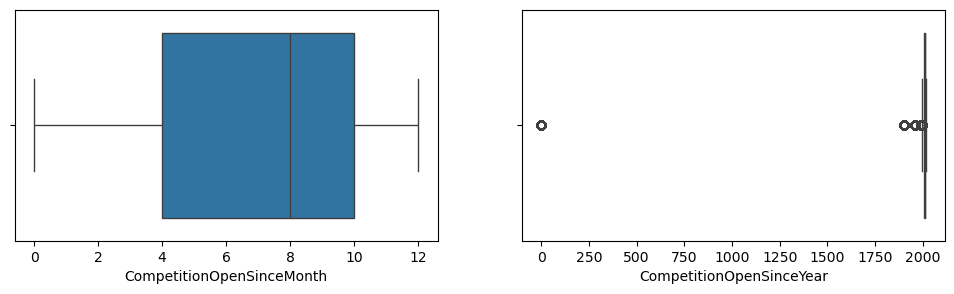

In [33]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(data = df,x = 'CompetitionOpenSinceMonth') 
#no outliers but the mean and median are approximately same and median gives the int value for the month
plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'CompetitionOpenSinceYear')
# outliers are present so going with the median

In [34]:
median_month = df['CompetitionOpenSinceMonth'].median() # 8.0
median_year = df['CompetitionOpenSinceYear'].median() #2010.0

# Impute the missing values for rows with CompetitionDistance > 0 with median of respective columns
comp_stores = (df['CompetitionDistance'] > 0) & df['CompetitionOpenSinceMonth'].isnull() & df['CompetitionOpenSinceYear'].isnull()
df.loc[comp_stores, 'CompetitionOpenSinceMonth'] = median_month
df.loc[comp_stores, 'CompetitionOpenSinceYear'] = median_year

In [35]:
df[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].isnull().sum()

CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
dtype: int64

In [36]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# Data Visualization

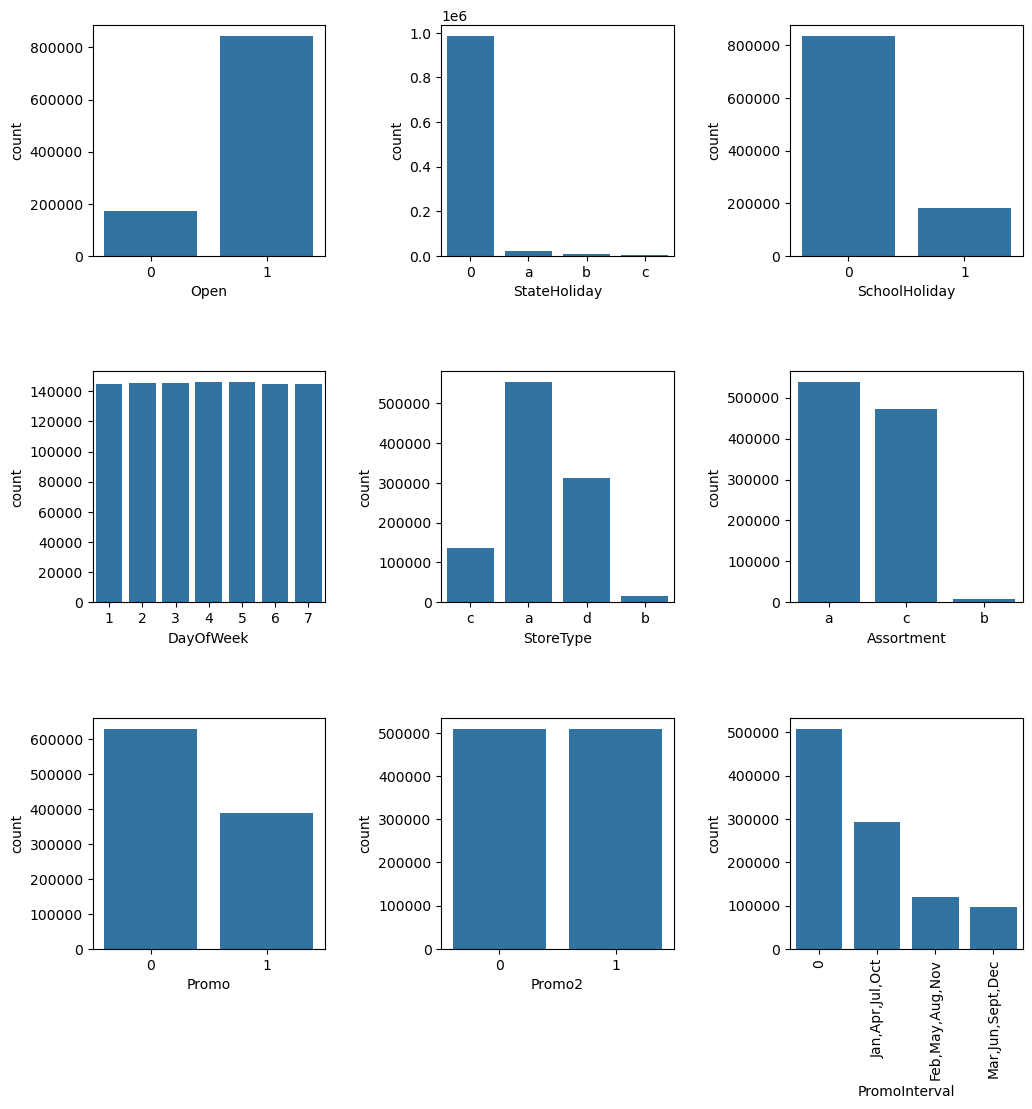

In [37]:
a=['Open','StateHoliday','SchoolHoliday','DayOfWeek','StoreType','Assortment','Promo','Promo2','PromoInterval']
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(len(a)):
    plt.subplot(3,3,i+1)
    if a[i] == 'PromoInterval':
        plt.xticks(rotation = 90)
    plt.xticks()
    sns.countplot(x=df[a[i]])  

**Analysis:**
1. The dataset primarily consists of records for open stores, with a smaller number indicating closure. These closures could be due to holidays or refurbishments.
2. The second bar chart reveals a minimal number of records with state holidays indicated. Interestingly, the occurrences of state holidays labeled "a," "b," and "c" are strikingly similar, suggesting no single state holiday has a significant influence.
3. The third graph shows a limited number of records coinciding with school holidays.
4. The fourth graph reveals a relatively even distribution of records across all days of the week.
5. Store type "a" dominates the data, followed by "d" and "c." Store type "b" has the fewest records.
6. The sixth graph indicates a substantial number of records for assortment types "a" and "c," while assortment "b" has significantly fewer occurrences.
7. Most records represent stores that don't offer a promotion (promo). However, there's half of the number of records offering them
8. The number of records with and without promo2 is nearly equal
9. A significant portion of records lacks a promo interval. The remaining records exhibit a variety of promo intervals.

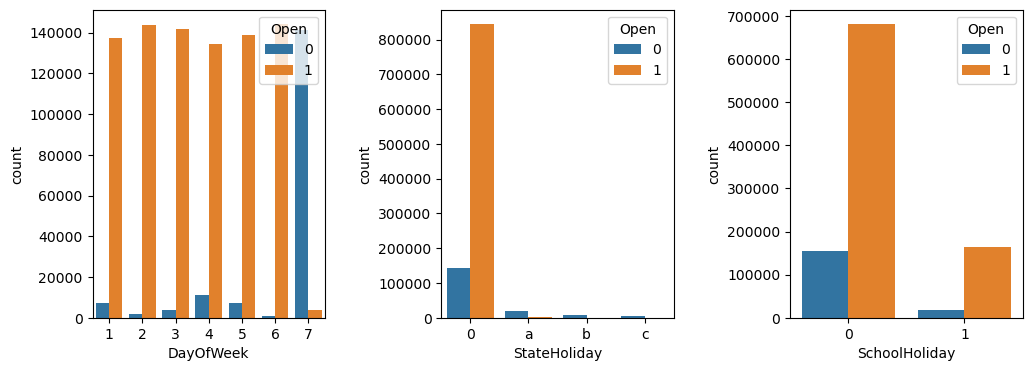

In [38]:
b = ['DayOfWeek','StateHoliday','SchoolHoliday']
plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(len(b)):
    plt.subplot(1,3,i+1)
    plt.xticks()
    sns.countplot(x=df[b[i]], hue = df['Open']) 

**Analysis:**
1. The first graph suggests a higher frequency of store closures on the seventh day of the week (Sunday). 
2. The data indicates a strong correlation between state holidays and store closures. In other words, stores tend to be closed during state holidays. 
3. The last graph reveals that school holidays appear to have minimal impact on store openings.

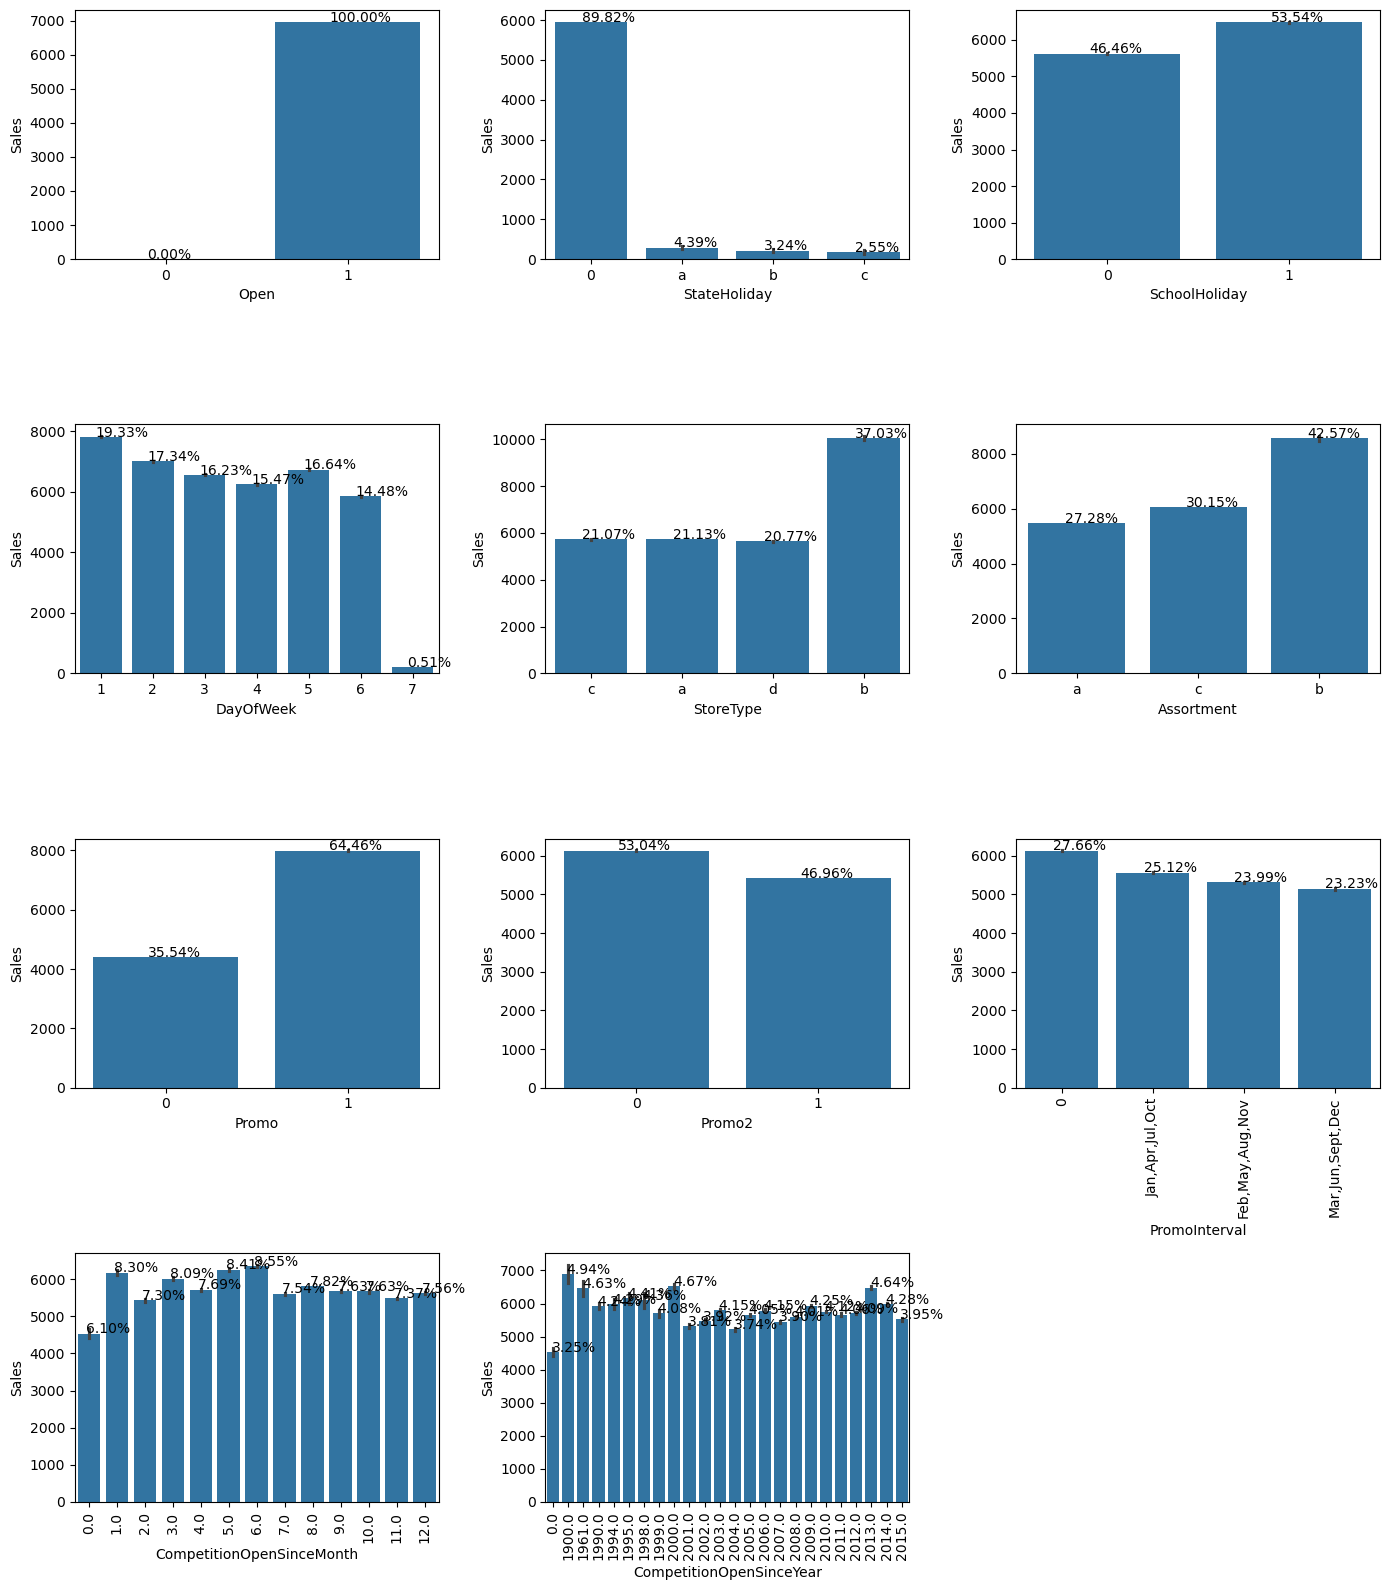

In [39]:
a = ['Open','StateHoliday','SchoolHoliday','DayOfWeek','StoreType','Assortment','Promo','Promo2',
     'PromoInterval','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
plt.figure(figsize=(14,16))
for i in range(len(a)):
    plt.subplot(4,3,i+1)
    ax = sns.barplot(data = df, x = a[i], y = 'Sales') 
    totals = []
    for patch in ax.patches:
        value = patch.get_height()
        totals.append(value)
    total = sum(totals)
    for patch in ax.patches:
        value =f"{(patch.get_height()*100)/total:.2f}%"
        w = patch.get_width()
        x = (patch.get_x() + w/2 - 0.1)
        y = patch.get_height() + 10
        ax.annotate(value, (x, y))
    if a[i] in ['PromoInterval','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']:
        plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

**Analysis:**
1. There appears to be a perfect correlation between store closures and zero sales. This is expected as stores wouldn't have sales when closed.
2. The data suggests a strong negative correlation between state holidays and sales volume. Sales are significantly lower during state holidays, regardless of the specific holiday type ("a," "b," or "c"). Combining these categories as a single "state holiday" indicator in the model could be effective.
3. School holidays seem to have little impact on sales volume. The distribution of sales is similar regardless of school holidays.
4. Sunday has the lowest sales volume(0.51), likely due to the previously observed higher frequency of store closures on Sundays.
5. While store type "b" has the fewest records but the highest sales, this suggests store type "b" is a successful store type (high sales despite fewer stores)
6. While assortment "b" has the lowest number of records but the highest sales,this suggests assortment "b" might be particularly effective in driving sales despite fewer stores utilizing it. 
7. Stores offering promotions (Promo) seem to have double the sales compared to those without promotions. 
8. Promo2 doesn't appear to have a substantial impact on sales volume.
9. The distribution of sales is relatively similar across different promo intervals. This suggests that even with fewer records for some promo intervals, the sales volume tends to be comparable to periods with no promo interval.
10. The bar plots for sales versus 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' reveal that sales have remained relatively stable since the competitor store opened. This suggests that the competitor's presence may not have had a significant impact on sales across different months and years.

In [40]:
from IPython.display import display, Markdown

In [41]:
holiday = df[(df['Open']==0) 
           & (df['DayOfWeek']!=7) 
           & (df['SchoolHoliday']==0) 
           & (df['StateHoliday']==0)].shape[0]
print(f"There are {holiday} records where the stores are closed when there's no holiday")

There are 1422 records where the stores are closed when there's no holiday


 **Observation:** 
The line plots for sales and customer traffic are identical across the days of the week. This suggests a very strong positive correlation between sales and the number of customers. This pattern likely reflects store closures on Sundays, leading to a surge in customers and sales on Mondays when stores reopen.

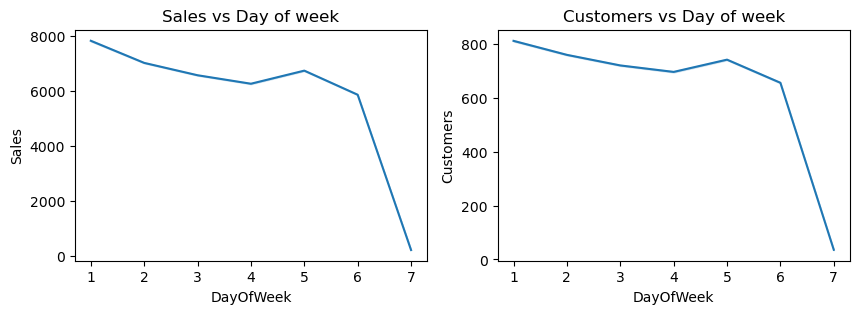

In [42]:
fig = plt.figure(figsize=(10, 3))
fig.add_subplot(1, 2, 1)
plt.title("Sales vs Day of week")
sns.lineplot(data = df,x = 'DayOfWeek', y = 'Sales')
# Maximum sales happen on Monday and minimum sales on Sunday as stores will be closed mostly on Sundays
fig.add_subplot(1, 2, 2)
plt.title("Customers vs Day of week")
sns.lineplot(data = df,x = 'DayOfWeek', y = 'Customers')
#Customers visit stores mostly on Weekdays than on Weekends might be because stores are closed on Sunday
text = ''' **Observation:** 
The line plots for sales and customer traffic are identical across the days of the week. This suggests a very strong positive correlation between sales and the number of customers. This pattern likely reflects store closures on Sundays, leading to a surge in customers and sales on Mondays when stores reopen.'''
display(Markdown(text))

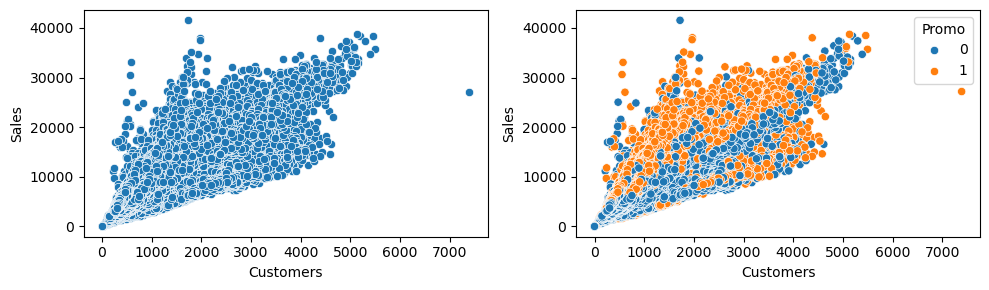

 **Observation:** 
The first plot, showing sales versus number of customers, reveals a strong positive correlation. This means as the number of customers increases, so do sales.The second plot we see a similar upward trend in both sales and customers, suggesting that promotions indeed lead to an increase in both metrics.

In [43]:
fig = plt.figure(figsize=(10, 3))
fig.add_subplot(1, 2, 1)
sns.scatterplot(data = df,x = 'Customers', y = 'Sales')
fig.add_subplot(1, 2, 2)
sns.scatterplot(data = df,x = 'Customers', y = 'Sales',hue='Promo')
plt.tight_layout()
plt.show()
text = ''' **Observation:** 
The first plot, showing sales versus number of customers, reveals a strong positive correlation. This means as the number of customers increases, so do sales.The second plot we see a similar upward trend in both sales and customers, suggesting that promotions indeed lead to an increase in both metrics.'''
display(Markdown(text))

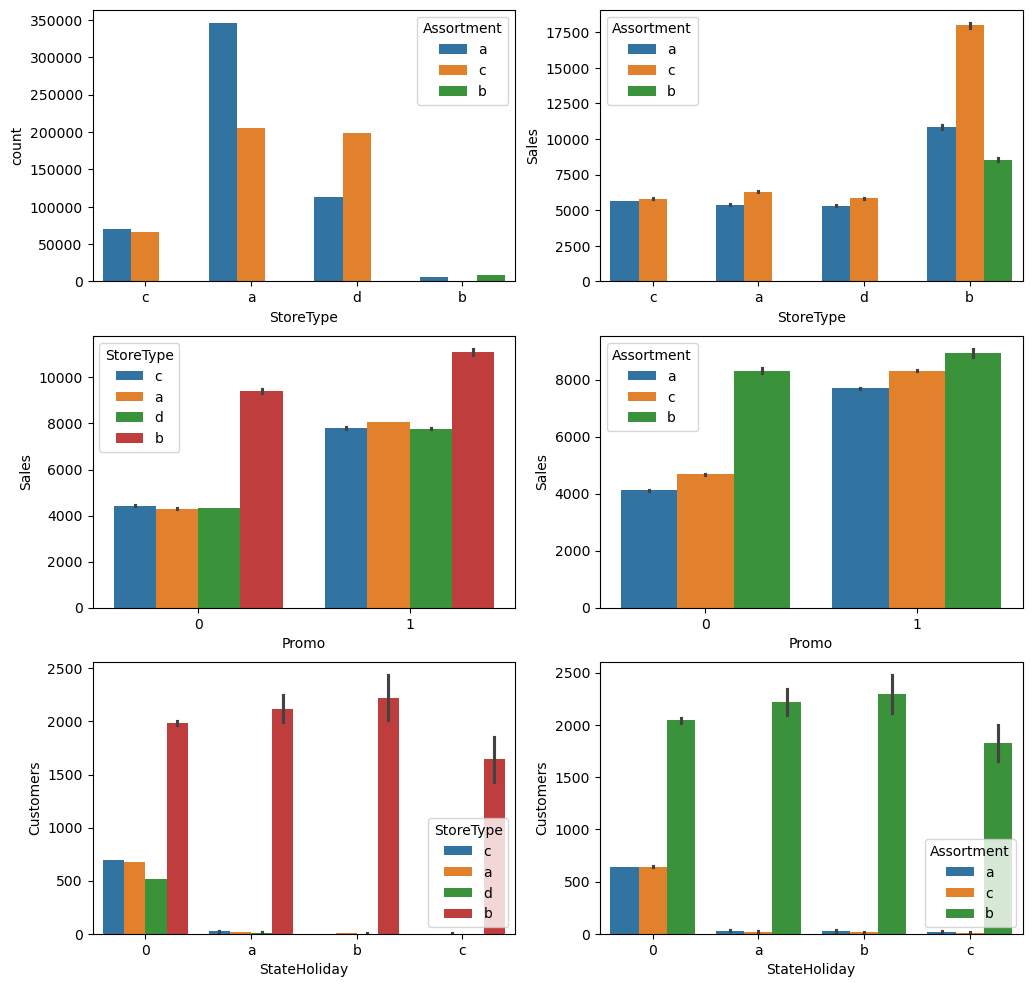

In [44]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(3,2,1)
sns.countplot(data = df , x = 'StoreType', hue = 'Assortment')

fig.add_subplot(3,2,2)
sns.barplot(data = df, x = 'StoreType', y = 'Sales',hue = 'Assortment')

fig.add_subplot(3,2,3)
sns.barplot(data = df,x = 'Promo', y = 'Sales', hue = 'StoreType')

fig.add_subplot(3,2,4)
sns.barplot(data = df,x = 'Promo', y = 'Sales', hue = 'Assortment')

fig.add_subplot(3,2,5)
sns.barplot(data = df,x = 'StateHoliday', y = 'Customers', hue = 'StoreType')

fig.add_subplot(3,2,6)
sns.barplot(data = df,x = 'StateHoliday', y = 'Customers', hue = 'Assortment')
plt.show()

**Analysis:**
1. Assortment 'b' is unique to stores of type 'b'.Both store type 'b' and assortment 'b' have the fewest records
2. Stores of type 'b' with assortment 'c' (extended assortment category) have the highest sales. This could indicate a strong preference for the combination of store type 'b' and the wider variety offered by assortment 'c'.
3. The plot suggests that all store types generally experience higher sales during promotions compared to non-promotional periods. However, stores of type 'b' are an interesting case. Their sales remain consistently high, even when there are no promotions. This strong performance is noteworthy despite having the fewest data points in the dataset
4. Sales are higher across all assortments when promotions are offered compared to non-promotional periods.Assortment 'b' maintains high sales even without promotions. This strong performance is noteworthy despite having the fewest data points in the 'b' category.
5. The bar plot suggests that customers visiting store type 'b' seem less affected by state holidays compared to other store types.
6. The bar plot suggests that State holidays seem to have minimal impact on customer visits to stores offering Assortment 'b'.

 **Observations:** 

    The plot reveals that sales are highest when there are no nearby competitors (CompetitionDistance = 0). This suggests that
    competition can negatively impact sales. Interestingly, the data also shows spikes in sales followed by dips, 
    which might be due to competitor locations being clustered together. However, sales are likely lower with increasing 
    competition distance.

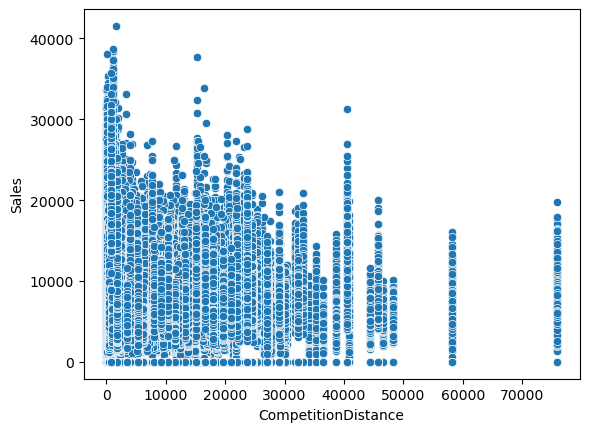

In [45]:
sns.scatterplot(data = df , x = 'CompetitionDistance', y ='Sales')
text = ''' **Observations:** 

    The plot reveals that sales are highest when there are no nearby competitors (CompetitionDistance = 0). This suggests that
    competition can negatively impact sales. Interestingly, the data also shows spikes in sales followed by dips, 
    which might be due to competitor locations being clustered together. However, sales are likely lower with increasing 
    competition distance.'''
display(Markdown(text))

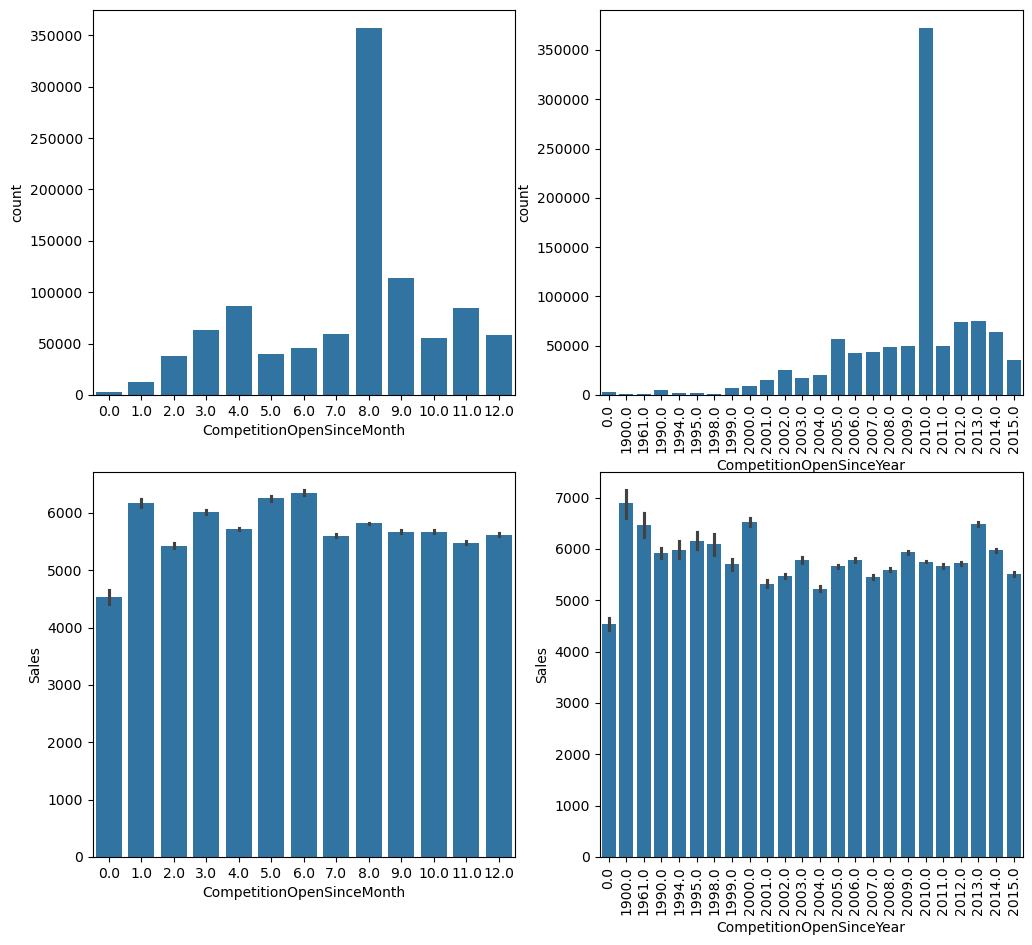

In [46]:
#CompetitionOpenSinceMonth Count Plot
fig = plt.figure(figsize=(12, 11))
fig.add_subplot(2, 2, 1)
sns.countplot(x = 'CompetitionOpenSinceMonth',data = df)

#CompetitionOpenSinceYear Count Plot
fig.add_subplot(2, 2, 2)
sns.countplot(x = 'CompetitionOpenSinceYear',data = df) 
plt.xticks(rotation=90)

#CompetitionOpenSinceMonth Sales Plot
fig.add_subplot(2, 2, 3)
sns.barplot(x = 'CompetitionOpenSinceMonth',data = df , y='Sales') 

fig.add_subplot(2, 2, 4)
#CompetitionOpenSinceYear Sales Plot
sns.barplot(x = 'CompetitionOpenSinceYear',data = df, y='Sales') 
plt.xticks(rotation=90)
plt.show()

**Analysis:**
1. August sees a high number of stores facing new competition (CompetitionOpenSinceMonth = 8.0)
2. A notable number of records have CompetitionOpenSinceYear set to 2010, indicating a significant number of stores reporting competition starting in that year.
3. Stores without competition (CompetitionOpenSinceMonth = 0.0) have the good amount of sales despite having the least records. While sales vary in competitive months, August (with the most new competitors) maintains sales comparable to other months.
4. Stores without competition (CompetitionOpenSinceYear = 0.0) have the good amount of sales despite having the least records. While sales vary in competitive years, 2010 (with the most new competitors) maintains sales comparable to other years.

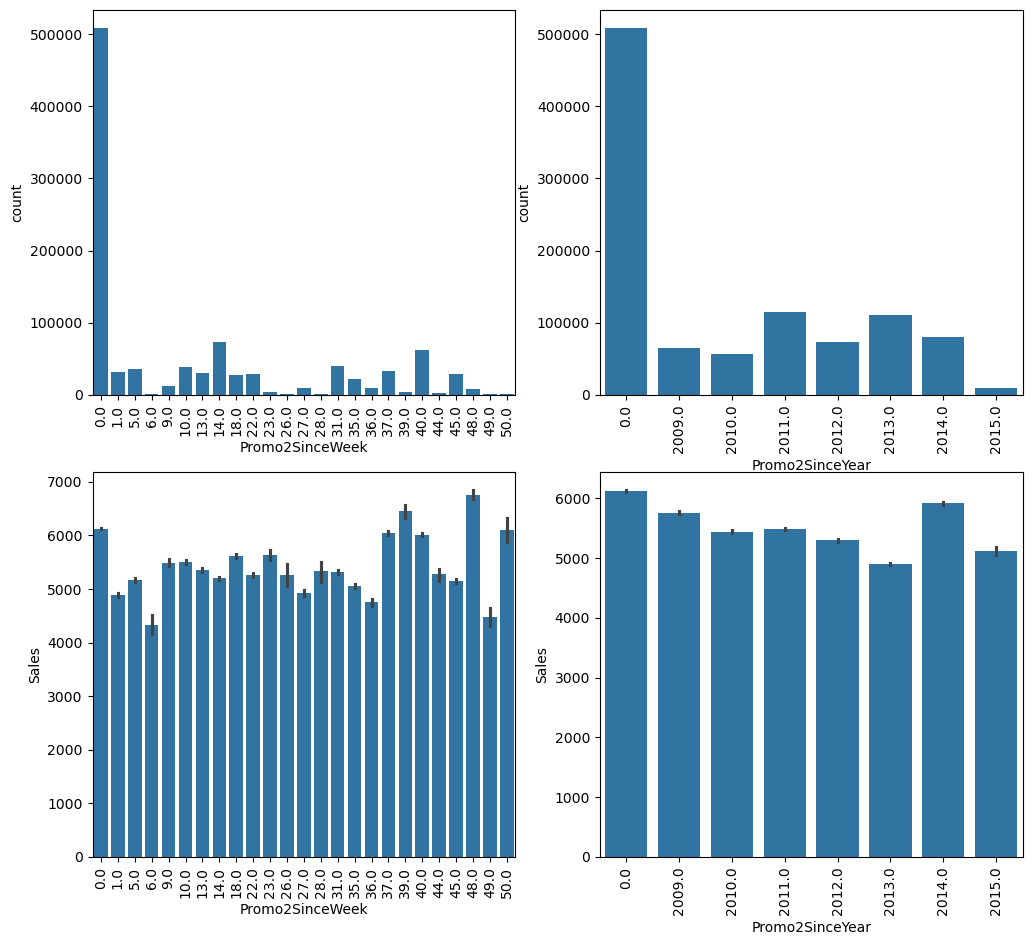

In [47]:
#Promo2SinceWeek Count Plot
fig = plt.figure(figsize=(12, 11))
fig.add_subplot(2, 2, 1)
sns.countplot(x = 'Promo2SinceWeek',data = df)
plt.xticks(rotation=90)

#Promo2SinceYear Count Plot
fig.add_subplot(2, 2, 2)
sns.countplot(x = 'Promo2SinceYear',data = df) 
plt.xticks(rotation=90)

#plotting Promo2SinceWeek vs sales
fig.add_subplot(2, 2, 3)
sns.barplot(x = 'Promo2SinceWeek',data = df , y ='Sales') 
plt.xticks(rotation=90)
fig.add_subplot(2, 2, 4)

#plotting Promo2SinceYear vs sales
sns.barplot(x = 'Promo2SinceYear',data = df, y ='Sales') 
plt.xticks(rotation=90)
plt.show()

**Analysis:**
1. Most stores (records with Promo2SinceWeek set to 0.0) did not offer Promo2 promotions. The remaining weeks show a fairly even distribution of Promo2 usage, with no single week dominating
2. While a significant portion of stores haven't offered Promo2 promotions (Promo2SinceYear set to 0.0), 2011 and 2013 stand out as the years with the most Promo2 activity. 
3. Stores without ongoing promotions (Promo2SinceWeek = 0.0) have sales comparable to other weeks, even though they have the most data points. Interestingly, sales for stores with active promotions (Promo2) show some variation, but stay within a similar range.
4. Stores that never ran Promo2 promotions (Promo2SinceYear = 0.0) have sales comparable to other years, even though their data volume is highest. Interestingly, for stores with active Promo2, sales were relatively stable from 2010 to 2012, dipping slightly in 2013 and spiking in 2014.

## Heatmap-Correlation matrix

<Axes: >

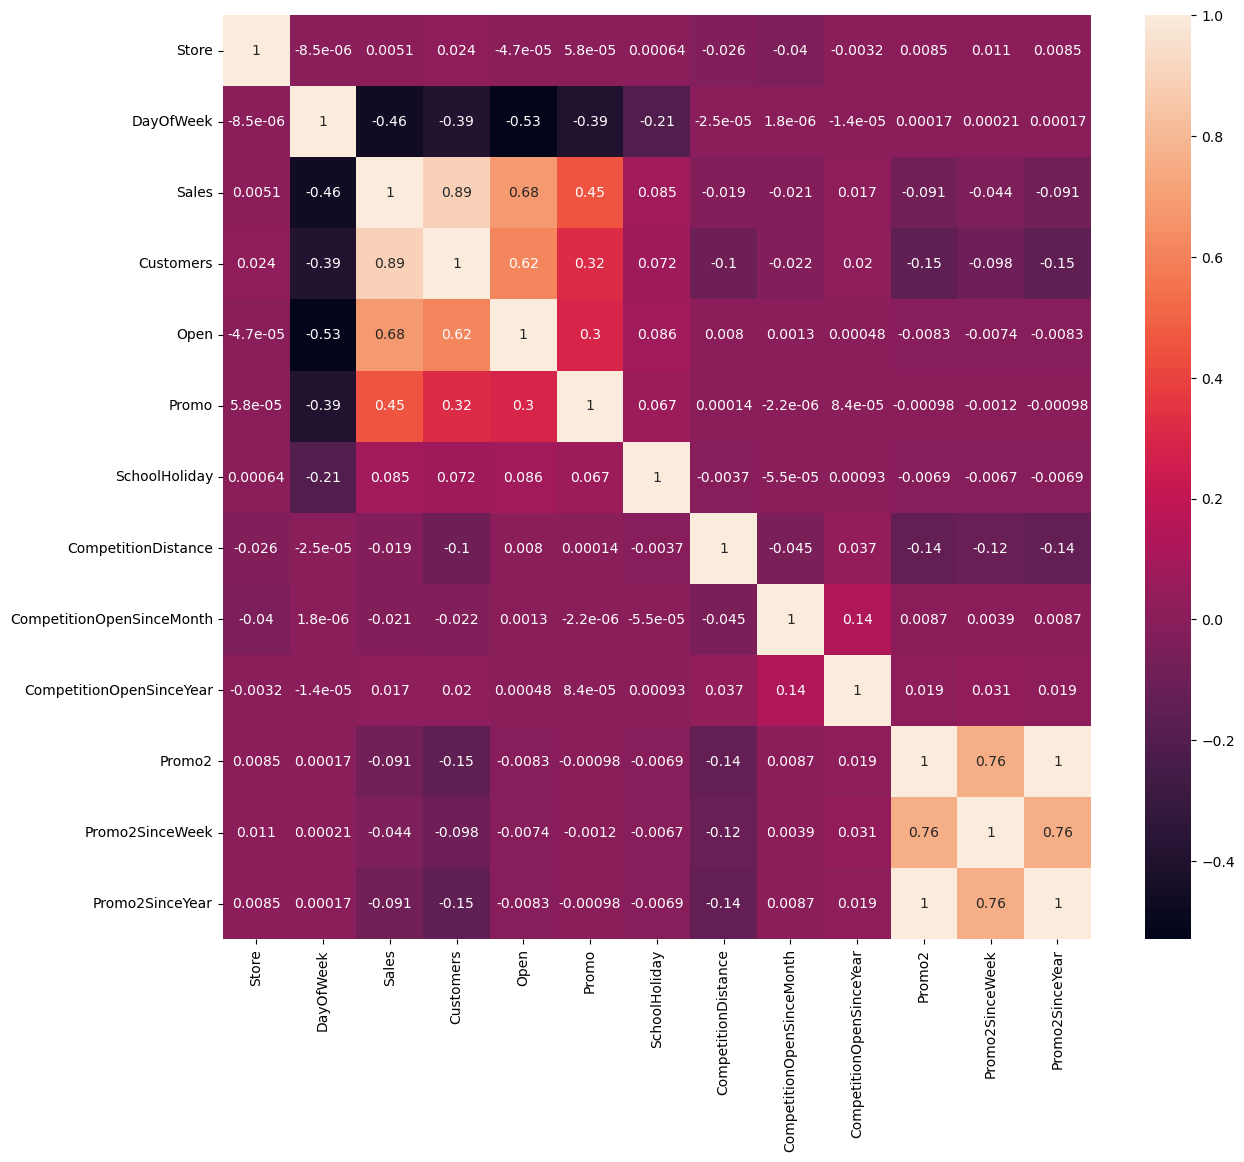

In [48]:
df_corr = df.drop(['StateHoliday','StoreType','Assortment','Date','PromoInterval'],axis=1)
plt.figure(figsize=(14,12))
sns.heatmap(df_corr.corr(),annot=True)

**Observations**:
 1. The variable DayOfWeek display a negative correlation with Sales, indicating lower sales on weekends.
 2. Promo and Open exhibit positive correlations with Sales, which is expected since sales tend to rise during promotional periods, when stores are open, and with higher customer footfall.
 3. Customers exhibit a strong positive correlation with Sales.
 4. The positive correlation between Open and Customers is logical, reflecting that as stores remain open, more customers are likely to visit.
 5. There's a negative correlation between CompetitionDistance and sales, suggesting that sales tend to decrease as the distance to competitors increases.
 6. Promo2 shows a strong positive correlation with Promo2SinceWeek and Promo2SinceYear.

## Feature Engineering

In [49]:
#Extracting Year,Month,Day and WeekOfYear out of Date column
df['Year'] = df['Date'].apply(lambda x:x.year)
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].apply(lambda x:x.weekofyear)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,27,31


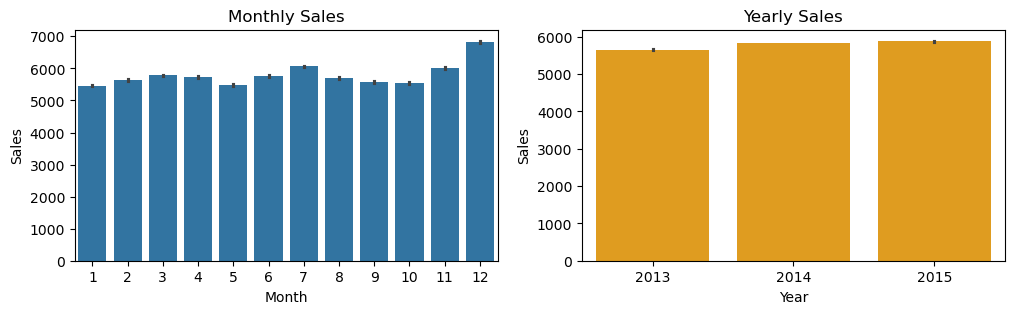

 **Observations:** 

    1. The barplot of sales versus month reveals a seasonal pattern, with sales increasing in the middle (around June) and at the  end of the year (around December).
    2. The distribution of sales across years in the barplot suggests no significant trend over time.

In [50]:
#plotting month vs sales
fig = plt.figure(figsize=(12, 3))
fig.add_subplot(1, 2, 1)
plt.title('Monthly Sales')
sns.barplot(x = 'Month',y = 'Sales',data = df)

#plotting year vs sales
fig.add_subplot(1, 2, 2)
plt.title('Yearly Sales')
sns.barplot(x = 'Year',y = 'Sales',data = df,color = 'orange') 
plt.show()
text = ''' **Observations:** 

    1. The barplot of sales versus month reveals a seasonal pattern, with sales increasing in the middle (around June) and at the  end of the year (around December).
    2. The distribution of sales across years in the barplot suggests no significant trend over time.'''
display(Markdown(text))

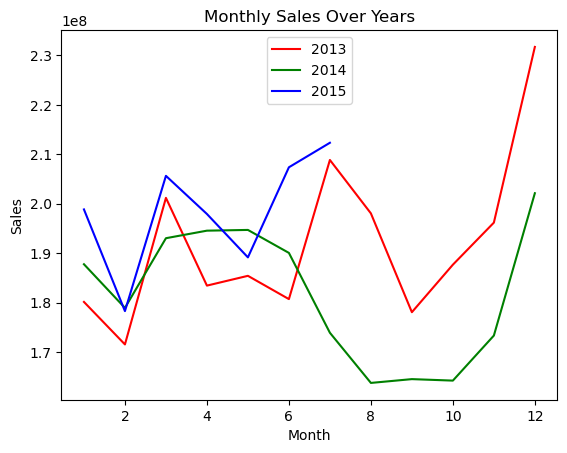

 **Observations:** 

    1. The plot reveals seasonal trends across the provided data, spanning from January 2013 to July 2015.
    2. Interestingly,sales show an upward trend within each year, peaking in the middle (around June to August) and at the end of   the year (around December).
    3. Additionally, sales appear consistently lower between months 8 and 10 (August to October), as well as in February. This could potentially indicate store closures due to holidays or refurbishment during these periods.
    4. It's important to note that the data for 2015 only covers the first half of the year, but its sales figures appear comparable to the full sales of the previous two years(from above barplot)

In [51]:
#monthly sales
sales_2013 = df[df['Year']== 2013].groupby('Month')['Sales'].sum().reset_index()
sales_2014 = df[df['Year']== 2014].groupby('Month')['Sales'].sum().reset_index()
sales_2015 = df[df['Year']== 2015].groupby('Month')['Sales'].sum().reset_index()
#plotting
plt.plot(np.arange(1,13), sales_2013.loc[:,'Sales'], label = '2013', color = 'red')
plt.plot(np.arange(1,13), sales_2014.loc[:,'Sales'], label = '2014', color = 'green')
plt.plot(np.arange(1,8), sales_2015.loc[:,'Sales'], label = '2015', color = 'blue')
plt.title('Monthly Sales Over Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc = 9)
plt.show()
text = ''' **Observations:** 

    1. The plot reveals seasonal trends across the provided data, spanning from January 2013 to July 2015.
    2. Interestingly,sales show an upward trend within each year, peaking in the middle (around June to August) and at the end of   the year (around December).
    3. Additionally, sales appear consistently lower between months 8 and 10 (August to October), as well as in February. This could potentially indicate store closures due to holidays or refurbishment during these periods.
    4. It's important to note that the data for 2015 only covers the first half of the year, but its sales figures appear comparable to the full sales of the previous two years(from above barplot)'''
display(Markdown(text))

# Data Manipulation and Feature Selection

In [52]:
df.shape

(1017209, 22)

## 1. Column 'StateHoliday'

**Analysis:** 
Sales are not influenced by the specific type of state holiday, and the occurrences of state holidays labeled "a," "b," and "c" are remarkably similar. These categories can be combined into a single "state holiday" indicator, where 1 indicates the presence of a state holiday.

In [53]:
df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)
df['StateHoliday'].value_counts()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64

## 2. Column 'Open'

**Analysis:** 
 Initial observation is that stores with Open = 0 (closed) won't generate sales. We can filter the DataFrame to include only rows where Open = 1 (stores open). This ensures we analyze data from operational stores. Since all open stores will have a value of 1, the column provides minimal information and can be removed without affecting data integrity.

In [54]:
df[df['Open'] == 0] #Open = 0 and Sales = 0

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
5,1,7,2015-07-26,0,0,0,0,0,0,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,26,30
12,1,7,2015-07-19,0,0,0,0,0,0,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,19,29
19,1,7,2015-07-12,0,0,0,0,0,0,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,12,28
26,1,7,2015-07-05,0,0,0,0,0,0,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,5,27
33,1,7,2015-06-28,0,0,0,0,0,0,c,...,9.0,2008.0,0,0.0,0.0,0,2015,6,28,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017182,1115,7,2013-01-27,0,0,0,0,0,0,d,...,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,27,4
1017189,1115,7,2013-01-20,0,0,0,0,0,0,d,...,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,20,3
1017196,1115,7,2013-01-13,0,0,0,0,0,0,d,...,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,13,2
1017203,1115,7,2013-01-06,0,0,0,0,0,1,d,...,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,6,1


In [55]:
#droping rows where Open = 0
df = df[df['Open'] != 0]
df.shape

(844392, 22)

In [56]:
df.head() #Open has only one value now which is 1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,27,31


In [57]:
#Dropping 'Open' column
df.drop('Open', axis = 1 , inplace = True)
df.shape

(844392, 21)

## 3. Columns 'Promo2SinceWeek', 'Promo2SinceYear'

**Analysis:** Observing the heatmap, it's evident that Promo2, Promo2SinceWeek, and Promo2SinceYear exhibit strong positive correlations. To mitigate multicollinearity in the data, we will remove 'Promo2SinceWeek', 'Promo2SinceYear'

In [58]:
df.drop(['Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)
df.shape

(844392, 19)

## 4. Columns 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'

**Analysis:** Examination of CompetitionOpenSinceMonth and CompetitionOpenSinceYear reveals that even when competitors entered the market in August 2010, sales remained relatively unchanged. Sales consistently fall within the same range regardless of the month or year competitors entered the market. 

In [59]:
df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'],axis=1,inplace=True)
df.shape

(844392, 17)

## 4. Column 'PromoInterval'

**Analysis:**  The PromoInterval column seems to have a relatively even distribution across its categories. Additionally, sales figures appear to be similar for each category. This suggests that the frequency of promotions (as captured by PromoInterval) might not have a significant impact on sales in this dataset.Given these observations, we can drop the PromoInterval column.

In [60]:
df.drop(['PromoInterval'],axis=1,inplace=True)
df.shape

(844392, 16)

## 5. Column 'Sales' 

### Identifying Outliers in 'Sales' column


**Interpretation of the Plots:**
1. **Boxplot (Left)**:The boxplot shows that there are many outliers in the sales data, as indicated by the numerous points beyond the whiskers.
2. **Distribution Plot (Right)**:The distribution plot indicates that the sales data is right-skewed, with most data points concentrated on the left side of the plot.
In summary, the sales data contains numerous outliers and is heavily right-skewed, indicating that while most sales values are relatively low, there are some exceptionally high sales values.


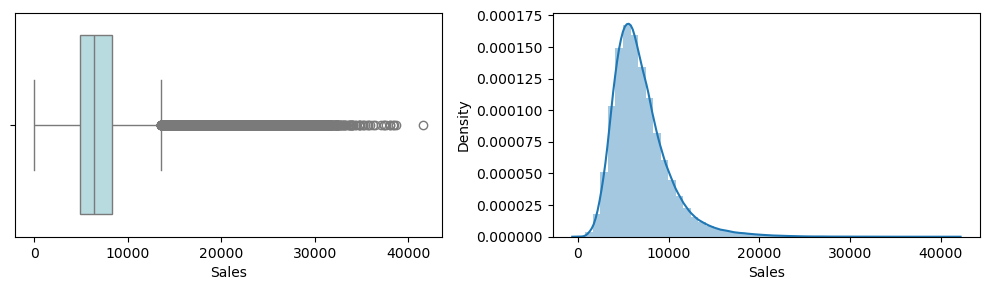

In [61]:
fig = plt.figure(figsize=(10, 3))
fig.add_subplot(1, 2, 1)
sns.boxplot(data = df , x = 'Sales',color = 'powderblue')
fig.add_subplot(1, 2, 2)
sns.distplot(df['Sales'])
plt.tight_layout()

from IPython.display import display, Markdown
text = """
**Interpretation of the Plots:**
1. **Boxplot (Left)**:The boxplot shows that there are many outliers in the sales data, as indicated by the numerous points beyond the whiskers.
2. **Distribution Plot (Right)**:The distribution plot indicates that the sales data is right-skewed, with most data points concentrated on the left side of the plot.
In summary, the sales data contains numerous outliers and is heavily right-skewed, indicating that while most sales values are relatively low, there are some exceptionally high sales values.
"""
display(Markdown(text))

In [62]:
text = '''**Observations:** 
The data reveals some interesting patterns in customer activity and sales:
- Zero Sales Days: There are 54 instances of zero sales when stores are open.
- Low Customer Traffic: In most cases, this corresponds to zero customers visiting the store. 
- Browsing vs. Buying: However, there are two notable exceptions: at store 948, five customers visited but resulted in zero sales, and at store 1100, three customers visited without making any purchases.
'''
display(Markdown(text))
print("Number of records where Sales = 0:",df[df['Sales']==0].shape[0],"\n")
print(df[df['Sales']==0].Customers.value_counts())
df[df['Sales']==0].head()

**Observations:** 
The data reveals some interesting patterns in customer activity and sales:
- Zero Sales Days: There are 54 instances of zero sales when stores are open.
- Low Customer Traffic: In most cases, this corresponds to zero customers visiting the store. 
- Browsing vs. Buying: However, there are two notable exceptions: at store 948, five customers visited but resulted in zero sales, and at store 1100, three customers visited without making any purchases.


Number of records where Sales = 0: 54 

Customers
0    52
5     1
3     1
Name: count, dtype: int64


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day,WeekOfYear
22589,25,4,2014-02-13,0,0,0,0,0,c,a,430.0,0,2014,2,13,7
22590,25,3,2014-02-12,0,0,0,0,0,c,a,430.0,0,2014,2,12,7
25212,28,4,2014-09-04,0,0,1,0,0,a,a,1200.0,1,2014,9,4,36
25213,28,3,2014-09-03,0,0,1,0,1,a,a,1200.0,1,2014,9,3,36
25214,28,2,2014-09-02,0,0,1,0,1,a,a,1200.0,1,2014,9,2,36


**Analysis:** Dropping records with zero sales and customers improves data quality and model accuracy. Similarly, removing instances where sales are zero but customers are present helps identify potential errors and anomalies. These adjustments enhance predictive insights for sales models aligned with business operations.

In [63]:
## Dropping 0 sales records
df = df[(df['Sales'] != 0)]
df.shape

(844338, 16)

In [64]:
Q1 = df['Sales'].quantile(0.25)
Q2 = df['Sales'].quantile()
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
Lower_fence = Q1 - (1.5*IQR)
Upper_fence = Q3 + (1.5*IQR)
Outliers = []
print("Lower fence: =",Lower_fence)
print("Upper fence =",Upper_fence)
for s in df['Sales']:
    if (s<Lower_fence) or (s>Upper_fence):
        Outliers.append(s)
print("The number of outliers in Sales column are",len(Outliers))

Lower fence: = -392.5
Upper fence = 13611.5
The number of outliers in Sales column are 30769


In [65]:
# Calculate total sales monthly in the Outliers data
monthly_sales_outliers =  pd.DataFrame(df[df['Sales'].isin(Outliers)].groupby('Month')['Sales'].sum())

# Calculate total sales in the Outliers data
total_sales_outliers = monthly_sales_outliers['Sales'].sum()

# Calculate the percentage of sales for each month
monthly_sales_outliers['Percentage'] = ((monthly_sales_outliers['Sales'] / total_sales_outliers) * 100).round(2)

text = """ **Observations:**
The data reveals a pattern of increased sales in December and June. Here are my initial assumptions about the reasons behind these peaks:

 - **December**: This rise in sales likely coincides with the festive season, particularly the Christmas holiday period. People typically spend more during this time, leading to a sales surge.
 - **March**: The sales peak next in Month of March likey due to the end of school leading into summer vacations
- **June**: My assumption is that the mid-year sales increase might be related to back-to-school shopping. Families often prepare for the new school year around this time, potentially driving up sales.
"""
display(Markdown(text))

monthly_sales_outliers = monthly_sales_outliers.sort_values(by='Percentage',ascending=False)
monthly_sales_outliers

 **Observations:**
The data reveals a pattern of increased sales in December and June. Here are my initial assumptions about the reasons behind these peaks:

 - **December**: This rise in sales likely coincides with the festive season, particularly the Christmas holiday period. People typically spend more during this time, leading to a sales surge.
 - **March**: The sales peak next in Month of March likey due to the end of school leading into summer vacations
- **June**: My assumption is that the mid-year sales increase might be related to back-to-school shopping. Families often prepare for the new school year around this time, potentially driving up sales.


,Sales,Percentage
Month,,
12,91581216,17.75
3,53902801,10.45
6,53243628,10.32
4,51764017,10.04
7,46617031,9.04
5,44851446,8.70
1,36706309,7.12
2,35354340,6.85
11,30152511,5.85


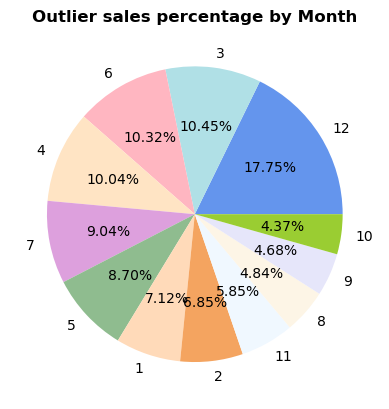

In [66]:
plt.pie(monthly_sales_outliers['Percentage'],labels = monthly_sales_outliers.index,autopct = '%.2f%%',colors = ['cornflowerblue','powderblue','lightpink','bisque', 'plum', 'darkseagreen', 'peachpuff', 'sandybrown','aliceblue','oldlace','lavender', 'yellowgreen'])
plt.title('Outlier sales percentage by Month', fontweight='bold')
plt.show()

In [67]:
text = ''' The exploration indicates that
  - Sunday Outliers: Stores are open on the 7th day of the week (Sunday) within the outlier data.
  - Store Type 'b' Dominates: These stores are exclusively of type 'b'.
  
**Observations:** 
 - Customers visit only store type 'b' on Sundays.
 - These visits result in significantly higher spending.'''
display(Markdown(text))

print(df[df['Sales'].isin(Outliers) & (df.DayOfWeek==7)].StoreType.value_counts())
df[df['Sales'].isin(Outliers) & (df.DayOfWeek==7)][['Store','DayOfWeek','Sales','StoreType','Assortment']].head()

 The exploration indicates that
  - Sunday Outliers: Stores are open on the 7th day of the week (Sunday) within the outlier data.
  - Store Type 'b' Dominates: These stores are exclusively of type 'b'.
  
**Observations:** 
 - Customers visit only store type 'b' on Sundays.
 - These visits result in significantly higher spending.

StoreType
b    591
Name: count, dtype: int64


,Store,DayOfWeek,Sales,StoreType,Assortment
76888,85,7,15153,b,a
76916,85,7,13899,b,a
76979,85,7,15386,b,a
77070,85,7,14336,b,a
77357,85,7,13629,b,a


In [68]:
# Calculate total sales daily in the Outliers data
daily_sales_outliers =  pd.DataFrame(df[df['Sales'].isin(Outliers)].groupby('DayOfWeek')['Sales'].sum())

# Calculate total sales in the Outliers data
total_sales_outliers = daily_sales_outliers['Sales'].sum()

# Calculate the percentage of sales for each day of the week
daily_sales_outliers['Percentage'] = ((daily_sales_outliers['Sales'] / total_sales_outliers) * 100).round(2)
text = """
**Observations:**
From the figures, it is observed that within the sales outliers data, 35% of the sales occur on Mondays. The likely reason for this is that most stores are closed on Sundays, leading customers to make their purchases on Monday.
"""
display(Markdown(text))
daily_sales_outliers = daily_sales_outliers.sort_values(by='Percentage',ascending=False)



**Observations:**
From the figures, it is observed that within the sales outliers data, 35% of the sales occur on Mondays. The likely reason for this is that most stores are closed on Sundays, leading customers to make their purchases on Monday.


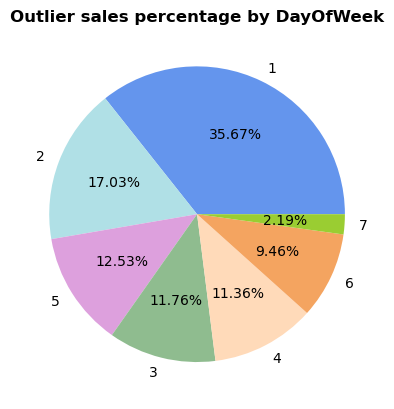

In [69]:
plt.pie(daily_sales_outliers['Percentage'],labels = daily_sales_outliers.index,autopct = '%.2f%%',colors = ['cornflowerblue','powderblue', 'plum', 'darkseagreen', 'peachpuff', 'sandybrown', 'yellowgreen'])
plt.title('Outlier sales percentage by DayOfWeek', fontweight='bold')
plt.show()

In [70]:
print("Sales Outliers Data:",df[df['Sales'].isin(Outliers)].Store.value_counts().iloc[:5],'\n')
print("Complete Data:",df.Store.value_counts().iloc[:5])
text = '''**Observations:**

- The value counts for the "Store" column were examined in both the complete dataset and the dataset containing sales outliers. Among the 942 sales records for Store 262, 940 records were found exclusively within the outliers dataset, particularly in stores where sales data exceeded the upper fence in the Interquartile Range (IQR) method for outlier detection.
- Notably, Store 262 is identified as belonging to Store Type 'b' and Assortment 'a'. Previous analysis has shown that Store Type 'b' establishments operate every day of the week and consistently achieve high sales, even without promotional events. This suggests that Store 262 attracts customers who make significant purchases, with only 2 records falling outside the outliers dataset.'''
display(Markdown(text))

Sales Outliers Data: Store
262     940
562     869
1114    779
251     769
788     759
Name: count, dtype: int64 

Complete Data: Store
769     942
1097    942
85      942
562     942
262     942
Name: count, dtype: int64


**Observations:**

- The value counts for the "Store" column were examined in both the complete dataset and the dataset containing sales outliers. Among the 942 sales records for Store 262, 940 records were found exclusively within the outliers dataset, particularly in stores where sales data exceeded the upper fence in the Interquartile Range (IQR) method for outlier detection.
- Notably, Store 262 is identified as belonging to Store Type 'b' and Assortment 'a'. Previous analysis has shown that Store Type 'b' establishments operate every day of the week and consistently achieve high sales, even without promotional events. This suggests that Store 262 attracts customers who make significant purchases, with only 2 records falling outside the outliers dataset.

In [71]:
text = '''**Observations:** This indicates that the majority of stores offer promotions, which correlates with higher sales, suggesting the validity of this trend.'''
display(Markdown(text))
df_Promo = df[df['Sales'].isin(Outliers)].groupby('Promo')['Sales'].sum()
df_Promo

**Observations:** This indicates that the majority of stores offer promotions, which correlates with higher sales, suggesting the validity of this trend.

Promo
0    143617888
1    372191849
Name: Sales, dtype: int64

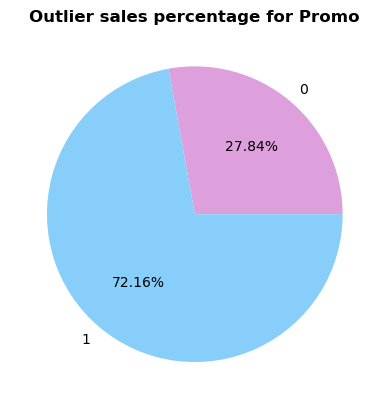

In [72]:
plt.pie(df_Promo,labels = df_Promo.index,autopct = '%.2f%%',colors = [ 'plum','lightskyblue'])
plt.title('Outlier sales percentage for Promo', fontweight='bold')
plt.show()

**Conclusion:** 
 - The outliers identified in the sales data are validated by several observations, including seasonal increases in monthly sales during festive and back-to-school periods. These outliers appear to be valid records, with the exception of those where sales equal zero being removed.
 - Higher sales on Mondays are attributed to store closures on Sundays, which is a common business practice.
 - Store Type 'b' predominates in the outliers data, particularly Store 262, which contributes 940 out of 942 sales records, indicating its significance.
 - Promotions are observed in the outlier sales data, coinciding with periods of maximum sales, suggesting their relevance from a business perspective.
 - Given these insights, removing these outliers would not be advisable as they hold significance in understanding business dynamics.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017207
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                844338 non-null  int64         
 1   DayOfWeek            844338 non-null  int64         
 2   Date                 844338 non-null  datetime64[ns]
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  int64         
 7   SchoolHoliday        844338 non-null  int64         
 8   StoreType            844338 non-null  object        
 9   Assortment           844338 non-null  object        
 10  CompetitionDistance  844338 non-null  float64       
 11  Promo2               844338 non-null  int64         
 12  Year                 844338 non-null  int64         
 13  Month             

In [74]:
df.shape

(844338, 16)

In [75]:
df1 = df.copy()

# Feature Scaling

Scaling the numerical features CompetitionDistance and Customers is done to normalize the data, bringing these features to a similar scale, promoting more effective and efficient model training.


In [76]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['CompetitionDistance', 'Customers']
scaler = StandardScaler()

df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,-0.517897,1,0,1,c,a,-0.534831,0,2015,7,31,31
1,1,4,2015-07-30,5020,-0.540330,1,0,1,c,a,-0.534831,0,2015,7,30,31
2,1,3,2015-07-29,4782,-0.597659,1,0,1,c,a,-0.534831,0,2015,7,29,31
3,1,2,2015-07-28,5011,-0.505434,1,0,1,c,a,-0.534831,0,2015,7,28,31
4,1,1,2015-07-27,6102,-0.375821,1,0,1,c,a,-0.534831,0,2015,7,27,31


# Sampling

Sampling in the dataset ensures a manageable size for faster model training and iteration. It also guarantees representation of all stores and dates, improving model generalizability across diverse data and time periods.

In [77]:
# Sample 100,000 rows randomly
sample = df1.sample(n=100000, random_state=44)

# Ensure all stores  are represented
stores_sample = df1.groupby('Store').apply(lambda x: x.sample(10, random_state=44)).reset_index(drop=True)
sample = pd.concat([sample, stores_sample]).drop_duplicates().reset_index(drop=True)

# Now, ensure all dates are present
dates_sample = df1.groupby('Date').apply(lambda x: x.sample(10, random_state=44)).reset_index(drop=True)
sample = pd.concat([sample, dates_sample]).drop_duplicates().reset_index(drop=True)

# If sample exceeds 100,000 rows, downsample to maintain 100,000 records
if len(sample) > 100000:
    sample = sample.sample(n=100000, random_state=44)

# Reset index
sample.reset_index(drop=True, inplace=True)

# Check the distribution of stores and dates to ensure good representation
print(f'Number of unique stores in sample: {sample["Store"].nunique()}')
print(f'Number of unique dates in sample: {sample["Date"].nunique()}')
print(f'Number of records in sample: {len(sample)}')

Number of unique stores in sample: 1115
Number of unique dates in sample: 942
Number of records in sample: 100000


# Splitting data into training and testing sets

In [78]:
# Convert 'Date' column to datetime objects
sample['Date'] = pd.to_datetime(sample['Date'])

# Sort the DataFrame by 'Date' in ascending order
sample = sample.sort_values(by='Date')

# Calculates the date, which is 6 weeks before the latest date
split_date = sample['Date'].max() - pd.Timedelta(weeks=6)

# Create the training and testing data sets
train_data = sample[sample['Date'] < split_date]
test_data = sample[sample['Date'] >= split_date]

print("Split date", split_date)
print("Train data shape:", train_data.shape)
print("Test data shape:",test_data.shape)
test_data.head(1)

Split date 2015-06-19 00:00:00
Train data shape: (95389, 16)
Test data shape: (4611, 16)


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day,WeekOfYear
80413,285,5,2015-06-19,5485,-0.687391,1,0,0,a,a,-0.388759,0,2015,6,19,25


In [79]:
#Splittting the dataset into input features and the target variable
X_train = train_data.drop(columns=['Sales', 'Date','Store'])
y_train = train_data['Sales']
X_test = test_data.drop(columns=['Sales', 'Date','Store'])
y_test = test_data['Sales']

# Encoding

In [80]:
from sklearn.preprocessing import OneHotEncoder

# Categorical features to encode
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

# Initialize and fit the encoder on training data
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(X_train[categorical_cols])

# Transform and add encoded features to training and test sets
X_train = X_train.join(pd.DataFrame(encoder.transform(X_train[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index))
X_test = X_test.join(pd.DataFrame(encoder.transform(X_test[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index))

# Drop original categorical columns
X_train.drop(columns=categorical_cols, inplace=True)
X_test.drop(columns=categorical_cols, inplace=True)

In [81]:
X_train.head()

,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,WeekOfYear,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
54810,2.463205,0,1,1,-0.534831,0,2013,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
94791,1.209447,0,1,1,-0.589928,1,2013,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
62174,-0.699854,0,1,1,-0.686028,1,2013,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
20643,0.688502,0,1,1,-0.514330,0,2013,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9991,2.273770,0,1,1,-0.542519,0,2013,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Model Building

## Building a dataframe to log model metrics.

In [82]:
Models_df = pd.DataFrame(columns = ['Model_Name', 'MAE_Train', 'MSE_Train', 'RMSE_Train','MAPE_Train', 'R2_Train', 'Adj_R2_Train' ,'MAE_Test', 'MSE_Test', 'RMSE_Test','MAPE_Test', 'R2_Test', 'Adj_R2_Test','Accuracy'])
Models_df

,Model_Name,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2_Test,Adj_R2_Test,Accuracy


## Function: Evaluate and Compare Model Performance

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(Model_Name,model_variable,X_train,X_test,y_train,y_test):
    """
    Trains a given model and evaluates its performance on both training and testing data.

    Parameters:
    -----------
    Model_Name : str
        The name of the model being evaluated.
    model_variable : object
        The instantiated model object (e.g., from scikit-learn) to be trained and evaluated.
    X_train : pandas.DataFrame or numpy.ndarray
        The training input features.
    X_test : pandas.DataFrame or numpy.ndarray
        The testing input features.
    y_train : pandas.Series or numpy.ndarray
        The training target values.
    y_test : pandas.Series or numpy.ndarray
        The testing target values.

    Returns:
    --------
    dict
        A dictionary containing the following performance metrics for both training and testing data:
        - 'Model_Name': Name of the model.
        - 'MAE_Train': Mean Absolute Error on the training data.
        - 'MSE_Train': Mean Squared Error on the training data.
        - 'RMSE_Train': Root Mean Squared Error on the training data.
        - 'MAPE_Train': Mean Absolute Percentage Error on the training data.
        - 'R2_Train': R-squared on the training data.
        - 'Adj_R2_Train': Adjusted R-squared on the training data.
        - 'MAE_Test': Mean Absolute Error on the testing data.
        - 'MSE_Test': Mean Squared Error on the testing data.
        - 'RMSE_Test': Root Mean Squared Error on the testing data.
        - 'MAPE_Test': Mean Absolute Percentage Error on the testing data.
        - 'R2_Test': R-squared on the testing data.
        - 'Adj_R2_Test': Adjusted R-squared on the testing data.
        - 'Accuracy': Accuracy calculated as (100 - MAPE_Test)."""
    # Train the model
    model_variable.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model_variable.predict(X_train)
    y_pred_test = model_variable.predict(X_test)
    
    def mape(x, y): 
        return np.mean(np.abs((x - y) / x)) * 100

    # Training data metrics
    MAE_Train = round(mean_absolute_error(y_train, y_pred_train),3)
    MSE_Train = round(mean_squared_error(y_train, y_pred_train),3)
    RMSE_Train = round(mean_squared_error(y_train, y_pred_train, squared=False),3)
    MAPE_Train = round(mape(y_train, y_pred_train),3)
    R2_Train = round(r2_score(y_train, y_pred_train),3)
    Adj_R2_Train = round(1-((1-R2_Train)*(len(y_train)-1)/(len(y_train) - X_train.shape[1]-1)),3)

    #Testing data metrics
    MAE_Test = round(mean_absolute_error(y_test, y_pred_test),3)
    MSE_Test = round(mean_squared_error(y_test, y_pred_test),3)
    RMSE_Test = round(mean_squared_error(y_test, y_pred_test, squared=False),3)
    MAPE_Test = round(mape(y_test, y_pred_test),3)
    R2_Test = round(r2_score(y_test, y_pred_test),3)
    Adj_R2_Test = round(1-((1-R2_Test)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)),3)
    Accuracy = round(100-MAPE_Test,3)
    # Create a dictionary to store the metrics
    model_metrics = {
        'Model_Name': Model_Name,
        'MAE_Train': MAE_Train,
        'MSE_Train': MSE_Train,
        'MAPE_Train': MAPE_Train,
        'RMSE_Train': RMSE_Train,
        'R2_Train': R2_Train,
        'Adj_R2_Train': Adj_R2_Train,
        'MAE_Test': MAE_Test,
        'MSE_Test': MSE_Test,
        'RMSE_Test': RMSE_Test,
        'MAPE_Test': MAPE_Test,
        'R2_Test': R2_Test,
        'Adj_R2_Test': Adj_R2_Test,
        'Accuracy': Accuracy
    }
    
    return model_metrics

## 1. Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_1_metrics = evaluate_model('Linear Regression',lr,X_train,X_test,y_train,y_test)
Models_df = pd.concat([Models_df, pd.DataFrame([model_1_metrics])], ignore_index=True)
Models_df

,Model_Name,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2_Test,Adj_R2_Test,Accuracy
0,Linear Regression,934.25,1627678.815,1275.805,14.599,0.835,0.835,946.123,1732034.676,1316.068,14.332,0.827,0.826,85.668


## 2. Decision Tree

In [85]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
model_2_metrics = evaluate_model('Decision Tree',dt,X_train,X_test,y_train,y_test)
Models_df = pd.concat([Models_df, pd.DataFrame([model_2_metrics])], ignore_index=True)
Models_df

,Model_Name,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2_Test,Adj_R2_Test,Accuracy
0,Linear Regression,934.25,1627678.815,1275.805,14.599,0.835,0.835,946.123,1732034.676,1316.068,14.332,0.827,0.826,85.668
1,Decision Tree,0.00,0.000,0.000,0.000,1.000,1.000,804.853,1335415.204,1155.602,11.565,0.867,0.866,88.435


In [86]:
base_accuracy = Models_df[Models_df['Model_Name']=='Linear Regression']['Accuracy'].values[0]
decision_accuracy = Models_df[Models_df['Model_Name']=='Decision Tree']['Accuracy'].values[0]
print("The Decision Tree model shows a \033[1m{:0.2f}% improvement in accuracy\033[0m compared to the Linear Regression model.".format( 100 * (decision_accuracy - base_accuracy) / base_accuracy))

The Decision Tree model shows a 3.23% improvement in accuracy compared to the Linear Regression model.


## 3. Decision Tree Tuned

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_tuned = DecisionTreeRegressor(random_state=42) 
grid_search = GridSearchCV(estimator=dt_tuned, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [89]:
best_dt_reg = grid_search.best_estimator_ # Get the best estimator from the grid search

model_3_metrics = evaluate_model('Decision Tree Tuned',best_dt_reg,X_train,X_test,y_train,y_test)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Models_df = pd.concat([Models_df, pd.DataFrame([model_3_metrics])], ignore_index=True)
Models_df

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


,Model_Name,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2_Test,Adj_R2_Test,Accuracy
0,Linear Regression,934.250,1627678.815,1275.805,14.599,0.835,0.835,946.123,1732034.676,1316.068,14.332,0.827,0.826,85.668
1,Decision Tree,0.000,0.000,0.000,0.000,1.000,1.000,804.853,1335415.204,1155.602,11.565,0.867,0.866,88.435
2,Decision Tree Tuned,396.882,337649.952,581.077,5.869,0.966,0.966,733.728,1108031.605,1052.631,10.438,0.889,0.888,89.562


In [90]:
base_accuracy  = Models_df[Models_df['Model_Name']=='Decision Tree']['Accuracy'].values[0]
decision_accuracy = Models_df[Models_df['Model_Name']=='Decision Tree Tuned']['Accuracy'].values[0]
print("The Decision Tree Tuned model shows a \033[1m{:0.2f}% improvement in accuracy\033[0m compared to the Decision Tree model.".format( 100 * (decision_accuracy - base_accuracy) / base_accuracy))

The Decision Tree Tuned model shows a 1.27% improvement in accuracy compared to the Decision Tree model.


## 4. Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf = RandomForestRegressor(random_state=44)
rf.fit(X_train,y_train)
model_4_metrics = evaluate_model('Random Forest',rf,X_train,X_test,y_train,y_test)
Models_df = pd.concat([Models_df, pd.DataFrame([model_4_metrics])], ignore_index=True)
Models_df

,Model_Name,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2_Test,Adj_R2_Test,Accuracy
0,Linear Regression,934.250,1627678.815,1275.805,14.599,0.835,0.835,946.123,1732034.676,1316.068,14.332,0.827,0.826,85.668
1,Decision Tree,0.000,0.000,0.000,0.000,1.000,1.000,804.853,1335415.204,1155.602,11.565,0.867,0.866,88.435
2,Decision Tree Tuned,396.882,337649.952,581.077,5.869,0.966,0.966,733.728,1108031.605,1052.631,10.438,0.889,0.888,89.562
3,Random Forest,205.786,86985.587,294.933,3.067,0.991,0.991,603.775,758068.124,870.671,8.493,0.924,0.924,91.507


In [93]:
base_accuracy  = Models_df[Models_df['Model_Name']=='Decision Tree Tuned']['Accuracy'].values[0]
decision_accuracy = Models_df[Models_df['Model_Name']=='Random Forest']['Accuracy'].values[0]
print("The Random Forest model shows a \033[1m{:0.2f}% improvement in accuracy\033[0m compared to the Decision Tree Tuned model.".format( 100 * (decision_accuracy - base_accuracy) / base_accuracy))

The Random Forest model shows a 2.17% improvement in accuracy compared to the Decision Tree Tuned model.


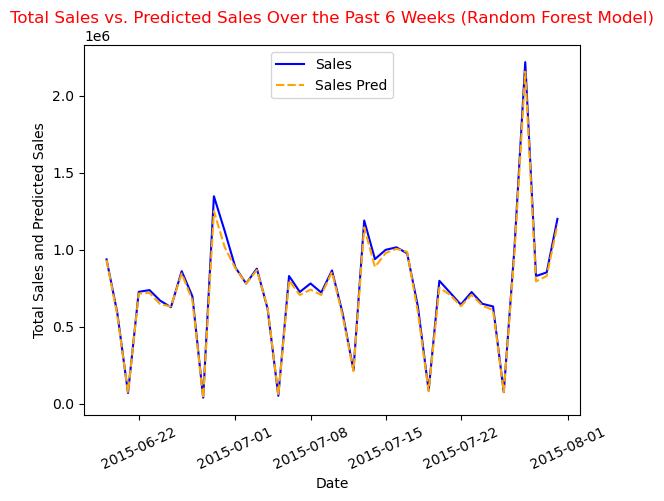

In [94]:
plt_df = test_data[['Date','Sales']].copy()
y_pred = rf.predict(X_test)
plt_df['Sales Pred'] = y_pred.tolist()
sns.lineplot(data=plt_df.groupby('Date')[['Sales','Sales Pred']].sum(), palette=['blue', 'orange'])
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)
plt.xlabel('Date')
plt.legend(loc = 9)
plt.title('Total Sales vs. Predicted Sales Over the Past 6 Weeks (Random Forest Model)', color='red')
plt.show()

## 5. Random Forest Tuned

In [95]:
from sklearn.model_selection import RandomizedSearchCV
rf_tuned = RandomForestRegressor()

param_dist = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = param_dist, n_iter = 10, 
                               cv = 3, verbose=2, random_state=44)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=  16.8s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=  14.9s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=  13.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  20.3s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  15.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  14.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=44, verbose=2)

In [96]:
best_rf_regg = rf_random.best_estimator_
model_5_metrics = evaluate_model('Random Forest Tuned',best_rf_regg,X_train,X_test,y_train,y_test)
best_params = rf_random.best_params_
print(f"Best parameters: {best_params}")
Models_df = pd.concat([Models_df, pd.DataFrame([model_5_metrics])], ignore_index=True)
Models_df

Best parameters: {'n_estimators': 130, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


,Model_Name,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2_Test,Adj_R2_Test,Accuracy
0,Linear Regression,934.250,1627678.815,1275.805,14.599,0.835,0.835,946.123,1732034.676,1316.068,14.332,0.827,0.826,85.668
1,Decision Tree,0.000,0.000,0.000,0.000,1.000,1.000,804.853,1335415.204,1155.602,11.565,0.867,0.866,88.435
2,Decision Tree Tuned,396.882,337649.952,581.077,5.869,0.966,0.966,733.728,1108031.605,1052.631,10.438,0.889,0.888,89.562
3,Random Forest,205.786,86985.587,294.933,3.067,0.991,0.991,603.775,758068.124,870.671,8.493,0.924,0.924,91.507
4,Random Forest Tuned,271.466,142454.832,377.432,4.190,0.986,0.986,770.813,1184646.596,1088.415,11.395,0.882,0.881,88.605


In [97]:
rf_random.best_params_

{'n_estimators': 130,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [98]:
decision_accuracy  = Models_df[Models_df['Model_Name']=='Random Forest']['Accuracy'].values[0]
base_accuracy = Models_df[Models_df['Model_Name']=='Random Forest Tuned']['Accuracy'].values[0]
print("The Random Forest Tuned model exhibits a \033[1m{:0.2f}% decrease in accuracy\033[0m compared to the Random Forest model.".format( 100 * (decision_accuracy - base_accuracy) / base_accuracy))

The Random Forest Tuned model exhibits a 3.28% decrease in accuracy compared to the Random Forest model.


## 6. XG Boost

In [99]:
from xgboost import XGBRegressor

In [100]:
xgb = XGBRegressor(random_state=44)
xgb.fit(X_train, y_train)
model_6_metrics = evaluate_model('XGBoost', xgb, X_train, X_test, y_train, y_test)
Models_df = pd.concat([Models_df, pd.DataFrame([model_6_metrics])], ignore_index=True)
Models_df

,Model_Name,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2_Test,Adj_R2_Test,Accuracy
0,Linear Regression,934.250,1627678.815,1275.805,14.599,0.835,0.835,946.123,1732034.676,1316.068,14.332,0.827,0.826,85.668
1,Decision Tree,0.000,0.000,0.000,0.000,1.000,1.000,804.853,1335415.204,1155.602,11.565,0.867,0.866,88.435
2,Decision Tree Tuned,396.882,337649.952,581.077,5.869,0.966,0.966,733.728,1108031.605,1052.631,10.438,0.889,0.888,89.562
3,Random Forest,205.786,86985.587,294.933,3.067,0.991,0.991,603.775,758068.124,870.671,8.493,0.924,0.924,91.507
4,Random Forest Tuned,271.466,142454.832,377.432,4.190,0.986,0.986,770.813,1184646.596,1088.415,11.395,0.882,0.881,88.605
5,XGBoost,486.293,434515.081,659.178,7.472,0.956,0.956,584.093,651491.772,807.150,8.926,0.935,0.935,91.074


In [101]:
decision_accuracy  = Models_df[Models_df['Model_Name']=='Random Forest']['Accuracy'].values[0]
base_accuracy = Models_df[Models_df['Model_Name']=='XGBoost']['Accuracy'].values[0]
print("The XGBoost model exhibits a \033[1m{:0.2f}% decrease in accuracy\033[0m compared to the Random Forest model.".format( 100 * (decision_accuracy - base_accuracy) / base_accuracy))

The XGBoost model exhibits a 0.48% decrease in accuracy compared to the Random Forest model.


In [102]:
Models_df

,Model_Name,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2_Test,Adj_R2_Test,Accuracy
0,Linear Regression,934.250,1627678.815,1275.805,14.599,0.835,0.835,946.123,1732034.676,1316.068,14.332,0.827,0.826,85.668
1,Decision Tree,0.000,0.000,0.000,0.000,1.000,1.000,804.853,1335415.204,1155.602,11.565,0.867,0.866,88.435
2,Decision Tree Tuned,396.882,337649.952,581.077,5.869,0.966,0.966,733.728,1108031.605,1052.631,10.438,0.889,0.888,89.562
3,Random Forest,205.786,86985.587,294.933,3.067,0.991,0.991,603.775,758068.124,870.671,8.493,0.924,0.924,91.507
4,Random Forest Tuned,271.466,142454.832,377.432,4.190,0.986,0.986,770.813,1184646.596,1088.415,11.395,0.882,0.881,88.605
5,XGBoost,486.293,434515.081,659.178,7.472,0.956,0.956,584.093,651491.772,807.150,8.926,0.935,0.935,91.074


In [103]:
Models_df = Models_df.set_index(['Model_Name'])
Models_df

,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2_Test,Adj_R2_Test,Accuracy
Model_Name,,,,,,,,,,,,,
Linear Regression,934.250,1627678.815,1275.805,14.599,0.835,0.835,946.123,1732034.676,1316.068,14.332,0.827,0.826,85.668
Decision Tree,0.000,0.000,0.000,0.000,1.000,1.000,804.853,1335415.204,1155.602,11.565,0.867,0.866,88.435
Decision Tree Tuned,396.882,337649.952,581.077,5.869,0.966,0.966,733.728,1108031.605,1052.631,10.438,0.889,0.888,89.562
Random Forest,205.786,86985.587,294.933,3.067,0.991,0.991,603.775,758068.124,870.671,8.493,0.924,0.924,91.507
Random Forest Tuned,271.466,142454.832,377.432,4.190,0.986,0.986,770.813,1184646.596,1088.415,11.395,0.882,0.881,88.605
XGBoost,486.293,434515.081,659.178,7.472,0.956,0.956,584.093,651491.772,807.150,8.926,0.935,0.935,91.074


# Analysis

### Key Observations:
 - High R-squared: All models achieve impressive R-squared values, especially the tree-based models (Decision Tree, Random Forest, and XGBoost). This indicates a strong correlation between the model's predictions and the actual sales values.
 - Overfitting: The Decision Tree model (without tuning) appears to be heavily overfitting the training data, with perfect R-squared and zero error. This is a classic sign of overfitting, which means the model is memorizing the training data and may not generalize well to new data.
 - Tuning Impact: Tuning the hyperparameters of Decision Tree significantly improved their performance on the test set, indicating that finding the right configuration is essential for achieving better generalization, but surprisingly tuning Random Forest model showed decrease in the accuracy 
 
### Evaluating the Models:
 - Decision Tree: The tuned Decision Tree model shows good performance on both training and testing sets, suggesting that tuning helped it generalize better.
 - Random Forest: The Random Forest model consistently outperforms the Decision Tree, showcasing its inherent robustness against overfitting due to its ensemble nature. However, tuning the Random Forest model resulted in a surprising 3.23% decrease in accuracy, suggesting that the initial configuration may have been optimal for this dataset.
 - XGBoost: XGBoost, known for its strong performance, is quite competitive with the Random Forest model. Its ability to handle complex interactions and regularizations often leads to excellent results.
 
### Model Selection:
 - Based on my observations, I am selecting the **Random Forest model** for the following reasons:
 - Both Random Forest and XGBoost demonstrate strong accuracy and robust generalization abilities in predicting retail sales. However, the Random Forest model offers clearer insights into the key features influencing sales, thanks to its straightforward feature importance scores.
 - Moreover, considering computational efficiency, Random Forest typically requires less computational resources compared to XGBoost, especially with larger datasets. This factor contributes to its practical advantage in scenarios where computational cost is a concern.

### Visualizing feature importance of the Random Forest model

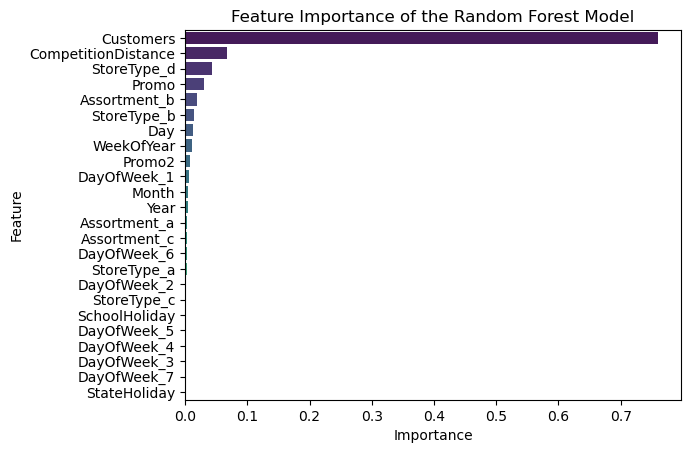

In [104]:
feature_importance_df = pd.DataFrame({"Feature": X_test.columns,"Importance": rf.feature_importances_})
feature_importance_df.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x = feature_importance_df['Importance'], y = feature_importance_df['Feature'], palette='viridis')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of the Random Forest Model")
plt.show()

The plot shows the importance of each feature in the Random Forest model. Features are ranked from most important (top) to least important (bottom) based on their contribution to the model's predictions.

**Key Insights:**

  - Customers: The feature "Customers" appears to be the most important feature for predicting sales in this model. This makes sense intuitively, as more customers generally lead to higher sales.
  - CompetitionDistance: The feature "CompetitionDistance" is also quite important, indicating that the proximity of competitors influences sales.
  - StoreType_d: The specific "StoreType_d" is a significant factor, suggesting that this type of store might be particularly impactful on sales.
  - Promo: The "Promo" feature is moderately important, indicating that promotions influence sales.
  - Other Features: The rest of the features have lower importance, which suggests they contribute less to the model's predictions.

## Comparing actual and predicted sales with the Random Forest model over the past six weeks

In [105]:
batch_df = pd.DataFrame(y_test)
Sales_pred = rf.predict(X_test)
batch_df['Pred Sales'] = Sales_pred.tolist()
batch_df['Diff'] = abs(batch_df['Sales'] - batch_df['Pred Sales'])
batch_df

,Sales,Pred Sales,Diff
80413,5485,5107.32,377.68
78480,4422,4274.74,147.26
29443,6128,6383.33,255.33
88691,8644,8612.19,31.81
80438,6224,6254.06,30.06
...,...,...,...
4255,9191,10571.78,1380.78
96830,3866,3921.14,55.14
21746,11006,12326.71,1320.71
56263,11967,10032.39,1934.61


In [106]:
batch_merge = pd.merge(test_data,batch_df,left_index=True, right_index=True)
batch_merge = batch_merge[['Store','Date','Sales_x','Pred Sales','Diff']]
batch_merge

,Store,Date,Sales_x,Pred Sales,Diff
80413,285,2015-06-19,5485,5107.32,377.68
78480,594,2015-06-19,4422,4274.74,147.26
29443,112,2015-06-19,6128,6383.33,255.33
88691,673,2015-06-19,8644,8612.19,31.81
80438,918,2015-06-19,6224,6254.06,30.06
...,...,...,...,...,...
4255,15,2015-07-31,9191,10571.78,1380.78
96830,83,2015-07-31,3866,3921.14,55.14
21746,526,2015-07-31,11006,12326.71,1320.71
56263,464,2015-07-31,11967,10032.39,1934.61


In [107]:
store_merge = pd.DataFrame(batch_merge.groupby(['Store','Date'])[['Sales_x','Pred Sales']].sum())
store_merge

Sales_x  Pred Sales
Store Date                           
1     2015-06-23     3762     3511.22
      2015-07-02     5558     5521.06
      2015-07-07     3650     3939.29
      2015-07-09     3897     3834.35
      2015-07-16     4427     4819.39
...                   ...         ...
1114  2015-07-31    27508    22671.63
1115  2015-06-24     5463     4891.80
      2015-07-08     5900     5007.38
      2015-07-17     7874     6748.50
      2015-07-28     8093     7074.99

[4611 rows x 2 columns]

In [108]:
# Reset the index to convert MultiIndex to columns
store_merge_reset = store_merge.reset_index()
# To access the 'Date' column
dates = store_merge_reset['Date']
print(dates.head())

0   2015-06-23
1   2015-07-02
2   2015-07-07
3   2015-07-09
4   2015-07-16
Name: Date, dtype: datetime64[ns]


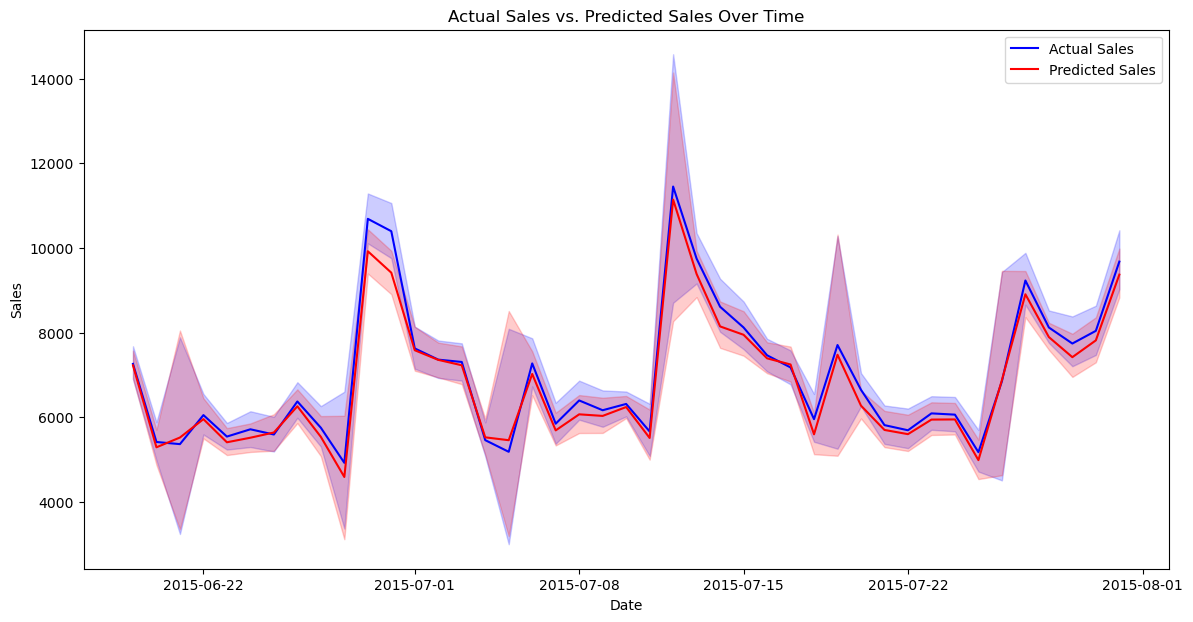

In [109]:
plt.figure(figsize=(14, 7))

# Plotting the actual sales
sns.lineplot(data=store_merge, x='Date', y='Sales_x', label='Actual Sales', color='blue')

# Plotting the predicted sales
sns.lineplot(data=store_merge, x='Date', y='Pred Sales', label='Predicted Sales', color='red')

plt.title('Actual Sales vs. Predicted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks()
plt.legend()

**Interpretation of the plot:**

The plot effectively compares actual sales (in blue) with predicted sales (in red) over time (recent 6 weeks). The shaded areas around the lines indicate the variability of the sales data. Here are some key observations:

- **Trends**: Both the actual and predicted sales lines follow similar trends, demonstrating the model's ability to capture the overall sales patterns.
- **Variability**: Spikes and drops in actual sales are mirrored in the predicted sales, although there may be some variation in magnitude.
- **Alignment**: The shaded areas show that the model's predictions are closely aligned with actual sales, with some deviations occurring during peak periods.